## HW2 Introduction to Data Science
### Eren Tümkaya 090190328

In [110]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns
import requests

### Q1)

### Obtaining the Data

Initially, I tried to get the API by looking at the documents such as [this](https://docs.ckan.org/en/2.8/api/). The IBB site was using this and was suggesting me to check the API documents to obtain data. After some tries, I realized that we had already worked with some dataset from this site, in the class before. I checked our second [lecture](https://github.com/kaygun/2023-Fall-381E/blob/main/lectures/lecture-02.ipynb) and did the same. I noticed that the part I needed to change was at the end of the link (date).

I tried to look at the different links of different months and years but unfortunetly I couldn't find any patterns. 

2020-03 ended like this: efff9df8-4f40-4a46-8c99-2b3b4c5e2b8c/download/traffic_density_202003.csv  
2021-02 ended like this: 395811ac-4152-4e04-88ef-8d4e30e6ac17/download/traffic_density_202102.csv  
2022.12 ended like this: dc788908-2b75-434f-9f3f-ef82ff33a158/download/traffic_density_202212.csv  

What I found out here was the fact that all of these datasets had their own id's and changing the last part of the link was not enough for me to obtain the data in a way it was tasked to me.

In [111]:
def dataset_trafic(year,month):
    dataset=pd.read_csv("https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/7b9a35a7-dc9c-4044-b117-1c0003104630/download/traffic_density_202309.csv")
    return dataset


I couldn't find a way to get the months as I wanted and was tasked to me. I leave it like this for now and I will try to change it if I come up with a better idea.


I couldn't find an other way to get it in a function. So I decided to leave it like this in order to complete all other tasks.

In [112]:
df=dataset_trafic(2023,9)
df.head()

DATE_TIME  LONGITUDE   LATITUDE GEOHASH  MINIMUM_SPEED  \
0  2023-09-01 00:00:00  29.317017  40.921326  sxkbg1              8   
1  2023-09-01 00:00:00  29.163208  40.915833  sxk8z8              4   
2  2023-09-01 00:00:00  29.130249  41.130066  sxk9yz             48   
3  2023-09-01 00:00:00  29.086304  41.009216  sxk9mc              4   
4  2023-09-01 00:00:00  28.811646  40.992737  sxk3pw             13   

   MAXIMUM_SPEED  AVERAGE_SPEED  NUMBER_OF_VEHICLES  
0            121             65                  95  
1             84             29                  18  
2            118             70                  15  
3            157             56                 158  
4            111             67                 110

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640769 entries, 0 to 1640768
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   DATE_TIME           1640769 non-null  object 
 1   LONGITUDE           1640769 non-null  float64
 2   LATITUDE            1640769 non-null  float64
 3   GEOHASH             1640769 non-null  object 
 4   MINIMUM_SPEED       1640769 non-null  int64  
 5   MAXIMUM_SPEED       1640769 non-null  int64  
 6   AVERAGE_SPEED       1640769 non-null  int64  
 7   NUMBER_OF_VEHICLES  1640769 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 100.1+ MB


I will get rid of any duplications, since it might be misleading for my analysis.

In [114]:
df[df.duplicated()]

Empty DataFrame
Columns: [DATE_TIME, LONGITUDE, LATITUDE, GEOHASH, MINIMUM_SPEED, MAXIMUM_SPEED, AVERAGE_SPEED, NUMBER_OF_VEHICLES]
Index: []

It is good that I don't have any. Now I will check the missing values.

In [115]:
df.isnull().sum()

DATE_TIME             0
LONGITUDE             0
LATITUDE              0
GEOHASH               0
MINIMUM_SPEED         0
MAXIMUM_SPEED         0
AVERAGE_SPEED         0
NUMBER_OF_VEHICLES    0
dtype: int64

I will go on with grouping the data as I was tasked.

### Grouping 

Here, I needed to check the pandas [site](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) to remember the usage of agg function. 

In [116]:
GroupedDf=df[["LONGITUDE","LATITUDE","AVERAGE_SPEED","NUMBER_OF_VEHICLES"]].groupby(df["GEOHASH"]).agg({"LONGITUDE": "first","LATITUDE" :"first" ,"AVERAGE_SPEED" : "mean","NUMBER_OF_VEHICLES": "mean"})
GroupedDf

LONGITUDE   LATITUDE  AVERAGE_SPEED  NUMBER_OF_VEHICLES
GEOHASH                                                         
sx7chk   27.965698  40.981750      84.105187           12.887608
sx7chm   27.965698  40.987244      70.066092           24.155172
sx7cht   27.976685  40.987244      36.829023           21.455460
sx7chw   27.976685  40.992737      67.688218           27.090517
sx7chx   27.976685  40.998230      70.951149           27.387931
sx7ck8   27.976685  41.003723      75.566092           25.102011
sx7ck9   27.976685  41.009216      54.900862           29.033046
sx7ckc   27.987671  41.009216      72.138929            8.208394
sx7ckf   27.987671  41.014709      75.375897           21.368723
sx7ckg   27.987671  41.020203      69.923741           17.212950
sx7cm5   27.998657  41.020203      73.569784           13.125180
sx7cmh   27.998657  41.025696      75.864943           24.745690
sx7cmj   27.998657  41.031189      73.410898            6.932253
sx7cmm   28.009644  41.031189      79.717986           25.959712
sx7cmq   28.009644  41.036682      83.900576           14.054755
sx7cmw   28.020630  41.036682      86.623563           24.899425
sx7cmx   28.020630  41.042175      89.585612           10.923741
sx7cmz   28.031616  41.042175      80.510057           25.333333
sx7cqp   28.042603  41.042175      71.329480            8.729769
sx7ctr   28.009644  41.086121      77.884840            6.983965
sx7ctx   28.020630  41.086121      75.673381           18.479137
sx7ctz   28.031616  41.086121      88.666667           16.193966
sx7cu3   27.965698  41.097107      73.298271           17.387608
sx7cu9   27.976685  41.097107      70.201149           21.975575
sx7cuc   27.987671  41.097107      73.621583           21.861871
sx7cv0   27.998657  41.091614      57.929395           20.280980
sx7cv1   27.998657  41.097107      53.479827           18.263689
sx7cv2   28.009644  41.091614      76.420144           20.900719
sx7cw0   28.042603  41.047668      54.290230           32.877874
sx7cw2   28.053589  41.047668      81.353448           22.994253
sx7cw3   28.053589  41.053162      86.994253           22.402299
sx7cw9   28.064575  41.053162      87.420977           26.698276
sx7cwd   28.064575  41.058655      87.426705            8.049347
sx7cwf   28.075562  41.058655      88.772989           28.515805
sx7cwn   28.042603  41.080627      90.123919           11.085014
sx7cwp   28.042603  41.086121      87.044798            9.432081
sx7cwq   28.053589  41.080627      84.779856           15.499281
sx7cwt   28.064575  41.075134      75.258065            1.032258
sx7cwv   28.075562  41.075134      82.570597           10.189229
sx7cww   28.064575  41.080627      88.928058           12.863309
sx7cwy   28.075562  41.080627      87.827586            1.454545
sx7cx4   28.086548  41.058655      87.974138           25.625000
sx7cx5   28.086548  41.064148      84.163328            4.252696
sx7cx7   28.097534  41.064148      83.909483           29.985632
sx7cxe   28.108521  41.064148      80.081594            2.079696
sx7cxj   28.086548  41.075134      63.417630           14.523121
sx7cxk   28.097534  41.069641      82.454676           19.087770
sx7cxm   28.097534  41.075134      83.151111            5.081481
sx7cxs   28.108521  41.069641      71.770445           52.622669
sx7cxt   28.108521  41.075134      63.362245            3.772109
sx7cxu   28.119507  41.069641      72.296987           27.156385
sx7cxv   28.119507  41.075134      78.505747           35.660920
sx7cxw   28.108521  41.080627      81.304015            2.397706
sx7cxx   28.108521  41.086121      80.600410            2.137295
sx7cz8   28.108521  41.091614      78.378661            2.156904
sx7cz9   28.108521  41.097107      76.833671            2.235294
sx7czd   28.108521  41.102600      77.023061            2.174004
sx7cze   28.108521  41.108093      64.633475            2.059322
sx7czs   28.108521  41.113586      77.308219            1.858447
sx7czt   28.108521  41.119080      87.613692

Now I will define a function so that I can find the required top 25's .My log can be seen [here](https://chat.openai.com/share/6bc43af8-fb0e-421e-81a4-36eefaa0ec97) although I am adding it to my md file.

In [117]:
def top25(dataf,column,order):
     if order=="desc": 
      sorted_df = dataf.sort_values(by=column, ascending=False).copy()
     elif order=="asc":
      sorted_df = dataf.sort_values(by=column, ascending=True).copy()
     print(sorted_df.head(25))

Finding the point with highest average number of vehicles:

In [118]:
top25(GroupedDf,"NUMBER_OF_VEHICLES","desc")

         LONGITUDE   LATITUDE  AVERAGE_SPEED  NUMBER_OF_VEHICLES
GEOHASH                                                         
sxk3xe   28.811646  41.064148      49.714491          432.842181
sxk9pq   29.152222  40.992737      40.444763          423.500717
sxkbgk   29.328003  40.937805      63.734577          411.017217
sxk3xd   28.811646  41.058655      49.022956          406.098996
sxkb6p   29.273071  40.866394      45.856528          396.345768
sxkbge   29.338989  40.932312      67.466284          392.691535
sxk985   28.833618  41.064148      53.645624          392.296987
sxk9nx   29.119263  40.998230      58.395983          384.121951
sxk3k8   28.679810  41.003723      48.308465          377.347202
sxk3py   28.822632  40.992737      53.578192          374.870875
sxk3rs   28.811646  41.025696      41.977044          367.187948
sxk3x8   28.811646  41.047668      43.271162          348.781923
sxk3x7   28.800659  41.064148      46.991392          341.687231
sxk9nh   29.097290  40.98

Finding the points with highest average speed

In [119]:
top25(GroupedDf,"AVERAGE_SPEED","desc")

         LONGITUDE   LATITUDE  AVERAGE_SPEED  NUMBER_OF_VEHICLES
GEOHASH                                                         
sxkc84   29.185181  41.058655     115.186275            3.862745
sxkc81   29.185181  41.053162     111.076700           17.068017
sxk9x3   29.152222  41.053162     109.841642            7.304985
sxkc90   29.229126  41.047668     109.438218           49.344828
sxkc92   29.240112  41.047668     108.837644           59.109195
sxkc88   29.207153  41.047668     107.906609           14.170977
sxkc3p   29.229126  41.042175     107.781609           18.507184
sxkc2x   29.207153  41.042175     107.535920           42.704023
sxkc83   29.196167  41.053162     106.664275           32.032999
sxkc2z   29.218140  41.042175     106.054598           52.251437
sxk4nq   28.405151  41.168518     105.902574            2.696691
sxkdmy   29.086304  41.212463     105.717360           15.319943
sxk9x2   29.152222  41.047668     102.688218           69.330460
sxk9x9   29.163208  41.05

Finding the points with the lowest average speed

In [120]:
top25(GroupedDf,"AVERAGE_SPEED","asc")

         LONGITUDE   LATITUDE  AVERAGE_SPEED  NUMBER_OF_VEHICLES
GEOHASH                                                         
sxk97b   28.998413  41.003723      12.000000            1.000000
sxk973   28.976440  41.009216      12.280172           13.459770
sxk974   28.965454  41.014709      13.932253            8.063328
sxkdht   29.031372  41.163025      14.748634            1.180328
sxkd79   28.987427  41.184998      15.358974            1.866667
sxk93p   28.877563  41.042175      15.446839           34.725575
sxk9hk   29.020386  40.981750      15.705357            5.471726
sxk90p   28.833618  40.998230      16.024425           47.883621
sxk9gb   28.998413  41.091614      16.040172           34.404591
sx7ghs   27.976685  41.333313      16.074803            1.374016
sxk9cf   28.910522  41.102600      16.167442            4.635659
sxkdss   29.031372  41.245422      16.424051            1.240506
sxk920   28.833618  41.003723      16.434720           52.599713
sxk9hm   29.020386  40.98

### Creating the Heatmap

I had no idea on how to do it hence I got some help from my favorite llm(chat gpt).[Log](https://chat.openai.com/share/da952597-b517-442d-80e0-df82318bdaae)

In [121]:

import folium
from folium.plugins import HeatMap

In [122]:
m = folium.Map(location=[df['LATITUDE'].mean(), df['LONGITUDE'].mean()], zoom_start=10)


In [174]:
heat_data = [[point["LATITUDE"], point["LONGITUDE"], point["NUMBER_OF_VEHICLES"]] for index, point in df.iterrows()]

HeatMap(heat_data, radius=15, blur=10).add_to(m)

This code below("m") is supposed to illustrate the map. The map was huge and it exceeded the limit of 100 mb's in github. Hence, I didnt run this code myself. Changing the radius and blur also effected the size. I tried bunch of combinations to find a sweet spot but I was unsuccesful in finding a size below 100 mb.

In [ ]:
m

### Q2) 

### Getting the Data

First I went to TÜİK website and did some research. I checked the databases [category](https://data.tuik.gov.tr/Search/Search?text=n%C3%BCfus). It wasn't easy to find [this](https://biruni.tuik.gov.tr/nufusapp/idari.zul) page where I downloaded the two files.(level0, level1 population data)

After that I wanted to obtain the GADM data. Since it was my first time using geopandas, I watched a tutorial about a similar exercise. The video I mentioned can be seen [here](https://www.youtube.com/watch?v=QRQnfLoVq2Q)

To get the GADM data I went to this [site](https://gadm.org/download_country.html) and checked the GEOJSON files. First link I found was for level 0 >>> "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_TUR_0.json".  It was easy to understand that changing the "0" at the end would result in obtaining the level 1 data. I tried the file and it seemed right. Moreover, I tested it with the link at the site for level 1.*** After some tries, I found out that the data for the (ilçe) information was inside "level2" link. I added "2" to the end of the link and it worked.

For this part I also got some help from an llm .My [log](https://chat.openai.com/share/8865839b-a433-4c2b-b45a-1da47ef0173c)

In [125]:
import geopandas as gpd
url = 'https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_TUR_2.json'
response = requests.get(url)
data = response.json()

gdf = gpd.GeoDataFrame.from_features(data['features'])
gdf

geometry        GID_2 GID_0  \
0    MULTIPOLYGON (((35.58970 37.94590, 35.56940 37...    TUR.1.1_1   TUR   
1    MULTIPOLYGON (((35.93400 36.87990, 35.92240 36...    TUR.1.2_1   TUR   
2    MULTIPOLYGON (((35.64170 37.70990, 35.62810 37...    TUR.1.3_1   TUR   
3    MULTIPOLYGON (((35.43950 37.30670, 35.45380 37...    TUR.1.4_1   TUR   
4    MULTIPOLYGON (((35.09230 37.49990, 35.12020 37...    TUR.1.5_1   TUR   
5    MULTIPOLYGON (((35.27930 36.64040, 35.28180 36...    TUR.1.6_1   TUR   
6    MULTIPOLYGON (((35.48850 37.28990, 35.49080 37...    TUR.1.7_1   TUR   
7    MULTIPOLYGON (((35.19810 37.81410, 35.21350 37...    TUR.1.8_1   TUR   
8    MULTIPOLYGON (((36.12660 37.78320, 36.11170 37...    TUR.1.9_1   TUR   
9    MULTIPOLYGON (((35.05460 36.97040, 35.07200 36...   TUR.1.10_1   TUR   
10   MULTIPOLYGON (((36.37400 38.08800, 36.33530 38...   TUR.1.11_1   TUR   
11   MULTIPOLYGON (((35.41450 36.58840, 35.41460 36...   TUR.1.12_1   TUR   
12   MULTIPOLYGON (((35.55980 37.21030, 35.56920 37...   TUR.1.13_1   TUR   
13   MULTIPOLYGON (((37.57310 37.55050, 37.61060 37...    TUR.2.1_1   TUR   
14   MULTIPOLYGON (((38.39750 37.90570, 38.34720 37...    TUR.2.2_1   TUR   
15   MULTIPOLYGON (((38.97810 37.79540, 38.93210 37...    TUR.2.3_1   TUR   
16   MULTIPOLYGON (((37.80410 37.72650, 37.77570 37...    TUR.2.4_1   TUR   
17   MULTIPOLYGON (((38.79730 38.05070, 38.79500 38...    TUR.2.5_1   TUR   
18   MULTIPOLYGON (((38.17720 37.41060, 38.17900 37...    TUR.2.6_1   TUR   
19   MULTIPOLYGON (((38.45810 37.62900, 38.48410 37...    TUR.2.7_1   TUR   
20   MULTIPOLYGON (((38.39750 37.90570, 38.41630 37...    TUR.2.8_1   TUR   
21   MULTIPOLYGON (((38.02190 37.67020, 37.99760 37...    TUR.2.9_1   TUR   
22   MULTIPOLYGON (((29.81540 37.81910, 29.83210 37...    TUR.3.1_1   TUR   
23   MULTIPOLYGON (((31.04750 38.88280, 31.04380 38...    TUR.3.2_1   TUR   
24   MULTIPOLYGON (((30.94720 38.79180, 30.96470 38...    TUR.3.3_1   TUR   
25   MULTIPOLYGON (((30.91580 38.67300, 30.92950 38...    TUR.3.4_1   TUR   
26   MULTIPOLYGON (((30.94720 38.79180, 30.93940 38...    TUR.3.5_1   TUR   
27   MULTIPOLYGON (((29.92920 37.99240, 29.90910 37...    TUR.3.6_1   TUR   
28   MULTIPOLYGON (((30.18260 37.90120, 30.11410 37...    TUR.3.7_1   TUR   
29   MULTIPOLYGON (((31.04750 38.88280, 31.04940 38...    TUR.3.8_1   TUR   
30   MULTIPOLYGON (((29.97210 37.99460, 29.92920 37...    TUR.3.9_1   TUR   
31   MULTIPOLYGON (((30.10260 38.66870, 30.10720 38...   TUR.3.10_1   TUR   
32   MULTIPOLYGON (((30.69070 39.09380, 30.68920 39...   TUR.3.11_1   TUR   
33   MULTIPOLYGON (((30.76660 39.12850, 30.77620 39...   TUR.3.12_1   TUR   
34   MULTIPOLYGON (((30.32030 38.28510, 30.30910 38...   TUR.3.13_1   TUR   
35   MULTIPOLYGON (((30.71050 38.78660, 30.73020 38...   TUR.3.14_1   TUR   
36   MULTIPOLYGON (((30.42860 38.39490, 30.41450 38...   TUR.3.15_1   TUR   
37   MULTIPOLYGON (((30.10260 38.66870, 30.09960 38...   TUR.3.16_1   TUR   
38   MULTIPOLYGON (((30.86070 38.55450, 30.84850 38...   TUR.3.17_1   TUR   
39   MULTIPOLYGON (((31.22750 38.63810, 31.26000 38...   TUR.3.18_1   TUR   
40   MULTIPOLYGON (((43.35880 39.38730, 43.36620 39...    TUR.4.1_1   TUR   
41   MULTIPOLYGON (((44.34570 39.38570, 44.32990 39...    TUR.4.2_1   TUR   
42   MULTIPOLYGON (((42.86100 39.68470, 42.82480 39...    TUR.4.3_1   TUR   
43   MULTIPOLYGON (((42.89180 39.65460, 42.91230 39...    TUR.4.4_1   TUR   
44   MULTIPOLYGON (((42.86100 39.68470, 42.92810 39...    TUR.4.5_1   TUR   
45   MULTIPOLYGON (((42.95260 39.35710, 42.97180 39...    TUR.4.6_1   TUR   
46   MULTIPOLYGON (((43.59720 39.68550, 43.59420 39...    TUR.4.7_1   TUR   
47   MULTIPOLYGON (((42.50790 39.69750, 42.53730 39...    TUR.4.8_1   TUR   
48   MULTIPOLYGON (((33.88090 38.54270, 33.87030 38...    TUR.5.1_1   TUR   
49   MULTIPOLYGON (((33.24020 38.24730, 33.24550 38...    TUR.5.2_1   TUR   
50   MULTIPOLYGON (((34.36320 38.29090, 34.34690 38...    TUR.5.3_1   TUR   
51   MULTIPOLYGON (((34.27650 38.28140, 34

I will do some formatting in the table so that I have a better looking one. I also want to get rid of the unnecesary columns.

In [126]:

gdf_counties=gdf.iloc[:,[0,5,7]]
gdf_counties=gdf_counties.rename(columns={"NAME_1":"City","NAME_2":"County"})
gdf_counties.head(30)

geometry      City      County
0   MULTIPOLYGON (((35.58970 37.94590, 35.56940 37...     Adana      Aladağ
1   MULTIPOLYGON (((35.93400 36.87990, 35.92240 36...     Adana      Ceyhan
2   MULTIPOLYGON (((35.64170 37.70990, 35.62810 37...     Adana        Feke
3   MULTIPOLYGON (((35.43950 37.30670, 35.45380 37...     Adana    İmamoğlu
4   MULTIPOLYGON (((35.09230 37.49990, 35.12020 37...     Adana   Karaisali
5   MULTIPOLYGON (((35.27930 36.64040, 35.28180 36...     Adana     Karataş
6   MULTIPOLYGON (((35.48850 37.28990, 35.49080 37...     Adana       Kozan
7   MULTIPOLYGON (((35.19810 37.81410, 35.21350 37...     Adana     Pozantı
8   MULTIPOLYGON (((36.12660 37.78320, 36.11170 37...     Adana   Saimbeyli
9   MULTIPOLYGON (((35.05460 36.97040, 35.07200 36...     Adana      Seyhan
10  MULTIPOLYGON (((36.37400 38.08800, 36.33530 38...     Adana  Tufanbeyli
11  MULTIPOLYGON (((35.41450 36.58840, 35.41460 36...     Adana  Yumurtalık
12  MULTIPOLYGON (((35.55980 37.21030, 35.56920 37...     Adana     Yüreğir
13  MULTIPOLYGON (((37.57310 37.55050, 37.61060 37...  Adiyaman       Besni
14  MULTIPOLYGON (((38.39750 37.90570, 38.34720 37...  Adiyaman    Çelikhan
15  MULTIPOLYGON (((38.97810 37.79540, 38.93210 37...  Adiyaman      Gerger
16  MULTIPOLYGON (((37.80410 37.72650, 37.77570 37...  Adiyaman     Gölbaşı
17  MULTIPOLYGON (((38.79730 38.05070, 38.79500 38...  Adiyaman       Kahta
18  MULTIPOLYGON (((38.17720 37.41060, 38.17900 37...  Adiyaman      Merkez
19  MULTIPOLYGON (((38.45810 37.62900, 38.48410 37...  Adiyaman      Samsat
20  MULTIPOLYGON (((38.39750 37.90570, 38.41630 37...  Adiyaman      Sincik
21  MULTIPOLYGON (((38.02190 37.67020, 37.99760 37...  Adiyaman         Tut
22  MULTIPOLYGON (((29.81540 37.81910, 29.83210 37...     Afyon    Başmakçı
23  MULTIPOLYGON (((31.04750 38.88280, 31.04380 38...     Afyon       Bayat
24  MULTIPOLYGON (((30.94720 38.79180, 30.96470 38...     Afyon    Bolvadin
25  MULTIPOLYGON (((30.91580 38.67300, 30.92950 38...     Afyon         Çay
26  MULTIPOLYGON (((30.94720 38.79180, 30.93940 38...     Afyon    Çobanlar
27  MULTIPOLYGON (((29.92920 37.99240, 29.90910 37...     Afyon     Dazkırı
28  MULTIPOLYGON (((30.18260 37.90120, 30.11410 37...     Afyon       Dinar
29  MULTIPOLYGON (((31.04750 38.88280, 31.04940 38...     Afyon     Emirdağ

Here, it is already obvious that I will have some problems while merging.For instance, "Zonguldak" is written like "Zinguldak". I won't be dealing with them here and I will try to find a "like" function just like in SQL to merge them. 

<Axes: >

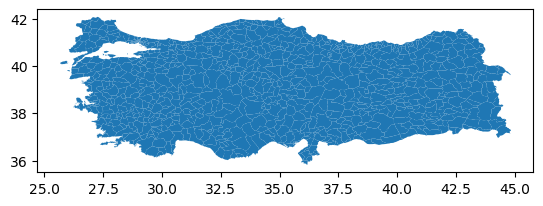

In [127]:
gdf_counties.plot()

I believe I can say that I have a good looking Turkey map. Now I will organise my excel file which I took from TÜİK and try to merge them together.

Well, there are many problems with the TÜİK data.I choose to go one by one. The excel file had so many fields which were not associated with what I needed. Hence, I wanted to give my read_excel function a range and get the table I need. I asked the question to chat gpt on how to do it. [mylog](https://chat.openai.com/share/76488d36-dc40-4aac-a89b-e8a745734277)  

After that I performed the small touches such as deleting the empty first row and deleting the columns which I wont be using.



In [128]:
excel_file_path = 'C:\EREN\Datasets\HW2-Population-level1.xlsx'

start_row = 8  
end_row = 955    
start_col = 'B' 
end_col = 'E'   

rows_range = f'{start_row}:{end_row}'
cols_range = f'{start_col}:{end_col}'

TUIK_level1= pd.read_excel(excel_file_path, skiprows=start_row-1 , usecols=cols_range)
TUIK_level1.rename(columns={"İl":"City", "İlçe":"County","Toplam":"Population"},inplace=True)
TUIK_level1.drop("Alt kademe",axis=1,inplace=True)
TUIK_level1.drop(0, inplace=True)
TUIK_level1

City           County  Population
1            Adana           Seyhan     807.934
2              NaN          Yüreğir     322.776
3              NaN           Aladağ       6.674
4              NaN           Ceyhan     108.602
5              NaN             Feke       4.632
6              NaN         İmamoğlu      30.428
7              NaN        Karaisalı       6.883
8              NaN          Karataş       9.189
9              NaN            Kozan      75.833
10             NaN          Pozantı       9.627
11             NaN        Saimbeyli       5.198
12             NaN       Tufanbeyli       5.332
13             NaN       Yumurtalık       4.745
14        Adıyaman           Merkez     178.538
15             NaN            Besni      36.123
16             NaN         Çelikhan      11.306
17             NaN           Gerger       4.223
18             NaN          Gölbaşı      28.656
19             NaN            Kahta      60.689
20             NaN           Samsat       6.917
21             NaN           Sincik       5.274
22             NaN              Tut       7.213
23           Afyon           Merkez     128.516
24             NaN         Başmakçı       7.816
25             NaN            Bayat       4.702
26             NaN         Bolvadin      52.398
27             NaN              Çay      18.137
28             NaN         Çobanlar       8.315
29             NaN          Dazkırı       6.555
30             NaN            Dinar      35.424
31             NaN          Emirdağ      20.508
32             NaN          Evciler       5.134
33             NaN          Hocalar       2.646
34             NaN         İhsaniye       4.466
35             NaN        İscehisar      10.542
36             NaN        Kızılören       2.556
37             NaN         Sandıklı      37.804
38             NaN         Sincanlı       5.826
39             NaN       Sultandağı       6.893
40             NaN            Şuhut      13.630
41            Ağrı           Merkez      79.764
42             NaN          Diyadin      13.320
43             NaN      Doğubeyazıt      56.261
44             NaN         Eleşkirt      15.339
45             NaN            Hamur       3.865
46             NaN           Patnos      71.829
47             NaN         Taşlıçay       5.180
48             NaN            Tutak       6.751
49          Amasya           Merkez      74.393
50             NaN         Göynücek       2.776
51             NaN     Gümüşhacıköy      14.057
52             NaN         Hamamözü       1.511
53             NaN         Merzifon      45.613
54             NaN          Suluova      42.715
55             NaN           Taşova      15.556
56          Ankara         Altındağ     400.023
57             NaN          Çankaya     758.490
58             NaN        Etimesgut     169.615
59             NaN          Gölbaşı      35.308
60             NaN         Keçiören     625.167
61             NaN            Mamak     412.771
62             NaN           Sincan     267.879
63             NaN      Yenimahalle     534.109
64             NaN           Akyurt       8.069
65             NaN             Ayaş       7.839
66             NaN             Bala       6.616
67             NaN        Beypazarı      34.441
68             NaN        Çamlıdere       6.303
69             NaN            Çubuk      46.605
70             NaN          Elmadağ      22.518
71             NaN            Evren       4.363
72             NaN            Güdül       5.806
73             NaN          Haymana      11.313
74             NaN          Kalecik      11.965
75             NaN            Kazan      15.871
76             NaN     Kızılcahamam      16.195
77             NaN         Nallıhan      17.181
78             NaN          Polatlı      79.992
79             NaN  Şereflikoçhisar      42.083
80         Antalya           Merkez     264.715
81             NaN              NaN      34.797
82             NaN              NaN     303.678
83             NaN           A

I didn't delete the "City" column because of an important reason. When I am merging the dataframes, I need to use more than the "County" column. The county column is not unique, it has values like "merkez" which the column contains many times. I needed to ensure the uniqueness before I merge so I will merge from both of those columns (City and the County)  

I need to fill the blank values in City. As I also saw on the excel. It is enough for me to fill all null's with the values before them. 

Also I am aware of the fact that there are some null values in counties as well. They indicate some subgroups of the value coming before them. I thought of assigning the same name to them and then grouping the whole table by city and county columns so that I can get the sum for each of those as well. 

In [129]:
TUIK_level1['City'].fillna(method='ffill', inplace=True)
TUIK_level1["County"].fillna(method="ffill",inplace=True)

TUIK_level1

City           County  Population
1            Adana           Seyhan     807.934
2            Adana          Yüreğir     322.776
3            Adana           Aladağ       6.674
4            Adana           Ceyhan     108.602
5            Adana             Feke       4.632
6            Adana         İmamoğlu      30.428
7            Adana        Karaisalı       6.883
8            Adana          Karataş       9.189
9            Adana            Kozan      75.833
10           Adana          Pozantı       9.627
11           Adana        Saimbeyli       5.198
12           Adana       Tufanbeyli       5.332
13           Adana       Yumurtalık       4.745
14        Adıyaman           Merkez     178.538
15        Adıyaman            Besni      36.123
16        Adıyaman         Çelikhan      11.306
17        Adıyaman           Gerger       4.223
18        Adıyaman          Gölbaşı      28.656
19        Adıyaman            Kahta      60.689
20        Adıyaman           Samsat       6.917
21        Adıyaman           Sincik       5.274
22        Adıyaman              Tut       7.213
23           Afyon           Merkez     128.516
24           Afyon         Başmakçı       7.816
25           Afyon            Bayat       4.702
26           Afyon         Bolvadin      52.398
27           Afyon              Çay      18.137
28           Afyon         Çobanlar       8.315
29           Afyon          Dazkırı       6.555
30           Afyon            Dinar      35.424
31           Afyon          Emirdağ      20.508
32           Afyon          Evciler       5.134
33           Afyon          Hocalar       2.646
34           Afyon         İhsaniye       4.466
35           Afyon        İscehisar      10.542
36           Afyon        Kızılören       2.556
37           Afyon         Sandıklı      37.804
38           Afyon         Sincanlı       5.826
39           Afyon       Sultandağı       6.893
40           Afyon            Şuhut      13.630
41            Ağrı           Merkez      79.764
42            Ağrı          Diyadin      13.320
43            Ağrı      Doğubeyazıt      56.261
44            Ağrı         Eleşkirt      15.339
45            Ağrı            Hamur       3.865
46            Ağrı           Patnos      71.829
47            Ağrı         Taşlıçay       5.180
48            Ağrı            Tutak       6.751
49          Amasya           Merkez      74.393
50          Amasya         Göynücek       2.776
51          Amasya     Gümüşhacıköy      14.057
52          Amasya         Hamamözü       1.511
53          Amasya         Merzifon      45.613
54          Amasya          Suluova      42.715
55          Amasya           Taşova      15.556
56          Ankara         Altındağ     400.023
57          Ankara          Çankaya     758.490
58          Ankara        Etimesgut     169.615
59          Ankara          Gölbaşı      35.308
60          Ankara         Keçiören     625.167
61          Ankara            Mamak     412.771
62          Ankara           Sincan     267.879
63          Ankara      Yenimahalle     534.109
64          Ankara           Akyurt       8.069
65          Ankara             Ayaş       7.839
66          Ankara             Bala       6.616
67          Ankara        Beypazarı      34.441
68          Ankara        Çamlıdere       6.303
69          Ankara            Çubuk      46.605
70          Ankara          Elmadağ      22.518
71          Ankara            Evren       4.363
72          Ankara            Güdül       5.806
73          Ankara          Haymana      11.313
74          Ankara          Kalecik      11.965
75          Ankara            Kazan      15.871
76          Ankara     Kızılcahamam      16.195
77          Ankara         Nallıhan      17.181
78          Ankara          Polatlı      79.992
79          Ankara  Şereflikoçhisar      42.083
80         Antalya           Merkez     264.715
81         Antalya           Merkez      34.797
82         Antalya           Merkez     303.678
83         Antalya           A

I will do the grouping now.

In [130]:
TUIK_level1_g = TUIK_level1.groupby(['City', 'County'])['Population'].sum().reset_index()
TUIK_level1_g

City           County  Population
0            Adana           Aladağ       6.674
1            Adana           Ceyhan     108.602
2            Adana             Feke       4.632
3            Adana        Karaisalı       6.883
4            Adana          Karataş       9.189
5            Adana            Kozan      75.833
6            Adana          Pozantı       9.627
7            Adana        Saimbeyli       5.198
8            Adana           Seyhan     807.934
9            Adana       Tufanbeyli       5.332
10           Adana       Yumurtalık       4.745
11           Adana          Yüreğir     322.776
12           Adana         İmamoğlu      30.428
13        Adıyaman            Besni      36.123
14        Adıyaman           Gerger       4.223
15        Adıyaman          Gölbaşı      28.656
16        Adıyaman            Kahta      60.689
17        Adıyaman           Merkez     178.538
18        Adıyaman           Samsat       6.917
19        Adıyaman           Sincik       5.274
20        Adıyaman              Tut       7.213
21        Adıyaman         Çelikhan      11.306
22           Afyon            Bayat       4.702
23           Afyon         Başmakçı       7.816
24           Afyon         Bolvadin      52.398
25           Afyon          Dazkırı       6.555
26           Afyon            Dinar      35.424
27           Afyon          Emirdağ      20.508
28           Afyon          Evciler       5.134
29           Afyon          Hocalar       2.646
30           Afyon        Kızılören       2.556
31           Afyon           Merkez     128.516
32           Afyon         Sandıklı      37.804
33           Afyon         Sincanlı       5.826
34           Afyon       Sultandağı       6.893
35           Afyon              Çay      18.137
36           Afyon         Çobanlar       8.315
37           Afyon         İhsaniye       4.466
38           Afyon        İscehisar      10.542
39           Afyon            Şuhut      13.630
40         Aksaray         Ağaçören       4.983
41         Aksaray            Eskil      22.125
42         Aksaray          Gülağaç       4.672
43         Aksaray        Güzelyurt       3.775
44         Aksaray           Merkez     129.949
45         Aksaray          Ortaköy      26.961
46         Aksaray        Sarıyahşi       7.751
47          Amasya         Göynücek       2.776
48          Amasya     Gümüşhacıköy      14.057
49          Amasya         Hamamözü       1.511
50          Amasya           Merkez      74.393
51          Amasya         Merzifon      45.613
52          Amasya          Suluova      42.715
53          Amasya           Taşova      15.556
54          Ankara           Akyurt       8.069
55          Ankara         Altındağ     400.023
56          Ankara             Ayaş       7.839
57          Ankara             Bala       6.616
58          Ankara        Beypazarı      34.441
59          Ankara          Elmadağ      22.518
60          Ankara        Etimesgut     169.615
61          Ankara            Evren       4.363
62          Ankara          Gölbaşı      35.308
63          Ankara            Güdül       5.806
64          Ankara          Haymana      11.313
65          Ankara          Kalecik      11.965
66          Ankara            Kazan      15.871
67          Ankara         Keçiören     625.167
68          Ankara     Kızılcahamam      16.195
69          Ankara            Mamak     412.771
70          Ankara         Nallıhan      17.181
71          Ankara          Polatlı      79.992
72          Ankara           Sincan     267.879
73          Ankara      Yenimahalle     534.109
74          Ankara        Çamlıdere       6.303
75          Ankara          Çankaya     758.490
76          Ankara            Çubuk      46.605
77          Ankara  Şereflikoçhisar      42.083
78         Antalya           Akseki      10.563
79         Antalya           Alanya      88.346
80         Antalya           Elmalı      14.561
81         Antalya           Finike       9.746
82         Antalya         Gaz

In [131]:
TUIK_level1_g["City"]

0              Adana
1              Adana
2              Adana
3              Adana
4              Adana
5              Adana
6              Adana
7              Adana
8              Adana
9              Adana
10             Adana
11             Adana
12             Adana
13          Adıyaman
14          Adıyaman
15          Adıyaman
16          Adıyaman
17          Adıyaman
18          Adıyaman
19          Adıyaman
20          Adıyaman
21          Adıyaman
22             Afyon
23             Afyon
24             Afyon
25             Afyon
26             Afyon
27             Afyon
28             Afyon
29             Afyon
30             Afyon
31             Afyon
32             Afyon
33             Afyon
34             Afyon
35             Afyon
36             Afyon
37             Afyon
38             Afyon
39             Afyon
40           Aksaray
41           Aksaray
42           Aksaray
43           Aksaray
44           Aksaray
45           Aksaray
46           Aksaray
47           

That seems about right. 23 datas are grouped so they are no longer in my list. Their population are summed up to their Counties.

I believe I finally managed to clear the excel. Now I will try to perform my merge whilst trying to solve the problem with names,typos : basically everything preventing me from merging.

First, I will try to look at them to see the obvious differences. 

In [132]:
pd.set_option('display.max_rows', None)
TUIK_level1_g

City           County  Population
0            Adana           Aladağ       6.674
1            Adana           Ceyhan     108.602
2            Adana             Feke       4.632
3            Adana        Karaisalı       6.883
4            Adana          Karataş       9.189
5            Adana            Kozan      75.833
6            Adana          Pozantı       9.627
7            Adana        Saimbeyli       5.198
8            Adana           Seyhan     807.934
9            Adana       Tufanbeyli       5.332
10           Adana       Yumurtalık       4.745
11           Adana          Yüreğir     322.776
12           Adana         İmamoğlu      30.428
13        Adıyaman            Besni      36.123
14        Adıyaman           Gerger       4.223
15        Adıyaman          Gölbaşı      28.656
16        Adıyaman            Kahta      60.689
17        Adıyaman           Merkez     178.538
18        Adıyaman           Samsat       6.917
19        Adıyaman           Sincik       5.274
20        Adıyaman              Tut       7.213
21        Adıyaman         Çelikhan      11.306
22           Afyon            Bayat       4.702
23           Afyon         Başmakçı       7.816
24           Afyon         Bolvadin      52.398
25           Afyon          Dazkırı       6.555
26           Afyon            Dinar      35.424
27           Afyon          Emirdağ      20.508
28           Afyon          Evciler       5.134
29           Afyon          Hocalar       2.646
30           Afyon        Kızılören       2.556
31           Afyon           Merkez     128.516
32           Afyon         Sandıklı      37.804
33           Afyon         Sincanlı       5.826
34           Afyon       Sultandağı       6.893
35           Afyon              Çay      18.137
36           Afyon         Çobanlar       8.315
37           Afyon         İhsaniye       4.466
38           Afyon        İscehisar      10.542
39           Afyon            Şuhut      13.630
40         Aksaray         Ağaçören       4.983
41         Aksaray            Eskil      22.125
42         Aksaray          Gülağaç       4.672
43         Aksaray        Güzelyurt       3.775
44         Aksaray           Merkez     129.949
45         Aksaray          Ortaköy      26.961
46         Aksaray        Sarıyahşi       7.751
47          Amasya         Göynücek       2.776
48          Amasya     Gümüşhacıköy      14.057
49          Amasya         Hamamözü       1.511
50          Amasya           Merkez      74.393
51          Amasya         Merzifon      45.613
52          Amasya          Suluova      42.715
53          Amasya           Taşova      15.556
54          Ankara           Akyurt       8.069
55          Ankara         Altındağ     400.023
56          Ankara             Ayaş       7.839
57          Ankara             Bala       6.616
58          Ankara        Beypazarı      34.441
59          Ankara          Elmadağ      22.518
60          Ankara        Etimesgut     169.615
61          Ankara            Evren       4.363
62          Ankara          Gölbaşı      35.308
63          Ankara            Güdül       5.806
64          Ankara          Haymana      11.313
65          Ankara          Kalecik      11.965
66          Ankara            Kazan      15.871
67          Ankara         Keçiören     625.167
68          Ankara     Kızılcahamam      16.195
69          Ankara            Mamak     412.771
70          Ankara         Nallıhan      17.181
71          Ankara          Polatlı      79.992
72          Ankara           Sincan     267.879
73          Ankara      Yenimahalle     534.109
74          Ankara        Çamlıdere       6.303
75          Ankara          Çankaya     758.490
76          Ankara            Çubuk      46.605
77          Ankara  Şereflikoçhisar      42.083
78         Antalya           Akseki      10.563
79         Antalya           Alanya      88.346
80         Antalya           Elmalı      14.561
81         Antalya           Finike       9.746
82         Antalya         Gaz

In [133]:
gdf_counties

geometry        City  \
0    MULTIPOLYGON (((35.58970 37.94590, 35.56940 37...       Adana   
1    MULTIPOLYGON (((35.93400 36.87990, 35.92240 36...       Adana   
2    MULTIPOLYGON (((35.64170 37.70990, 35.62810 37...       Adana   
3    MULTIPOLYGON (((35.43950 37.30670, 35.45380 37...       Adana   
4    MULTIPOLYGON (((35.09230 37.49990, 35.12020 37...       Adana   
5    MULTIPOLYGON (((35.27930 36.64040, 35.28180 36...       Adana   
6    MULTIPOLYGON (((35.48850 37.28990, 35.49080 37...       Adana   
7    MULTIPOLYGON (((35.19810 37.81410, 35.21350 37...       Adana   
8    MULTIPOLYGON (((36.12660 37.78320, 36.11170 37...       Adana   
9    MULTIPOLYGON (((35.05460 36.97040, 35.07200 36...       Adana   
10   MULTIPOLYGON (((36.37400 38.08800, 36.33530 38...       Adana   
11   MULTIPOLYGON (((35.41450 36.58840, 35.41460 36...       Adana   
12   MULTIPOLYGON (((35.55980 37.21030, 35.56920 37...       Adana   
13   MULTIPOLYGON (((37.57310 37.55050, 37.61060 37...    Adiyaman   
14   MULTIPOLYGON (((38.39750 37.90570, 38.34720 37...    Adiyaman   
15   MULTIPOLYGON (((38.97810 37.79540, 38.93210 37...    Adiyaman   
16   MULTIPOLYGON (((37.80410 37.72650, 37.77570 37...    Adiyaman   
17   MULTIPOLYGON (((38.79730 38.05070, 38.79500 38...    Adiyaman   
18   MULTIPOLYGON (((38.17720 37.41060, 38.17900 37...    Adiyaman   
19   MULTIPOLYGON (((38.45810 37.62900, 38.48410 37...    Adiyaman   
20   MULTIPOLYGON (((38.39750 37.90570, 38.41630 37...    Adiyaman   
21   MULTIPOLYGON (((38.02190 37.67020, 37.99760 37...    Adiyaman   
22   MULTIPOLYGON (((29.81540 37.81910, 29.83210 37...       Afyon   
23   MULTIPOLYGON (((31.04750 38.88280, 31.04380 38...       Afyon   
24   MULTIPOLYGON (((30.94720 38.79180, 30.96470 38...       Afyon   
25   MULTIPOLYGON (((30.91580 38.67300, 30.92950 38...       Afyon   
26   MULTIPOLYGON (((30.94720 38.79180, 30.93940 38...       Afyon   
27   MULTIPOLYGON (((29.92920 37.99240, 29.90910 37...       Afyon   
28   MULTIPOLYGON (((30.18260 37.90120, 30.11410 37...       Afyon   
29   MULTIPOLYGON (((31.04750 38.88280, 31.04940 38...       Afyon   
30   MULTIPOLYGON (((29.97210 37.99460, 29.92920 37...       Afyon   
31   MULTIPOLYGON (((30.10260 38.66870, 30.10720 38...       Afyon   
32   MULTIPOLYGON (((30.69070 39.09380, 30.68920 39...       Afyon   
33   MULTIPOLYGON (((30.76660 39.12850, 30.77620 39...       Afyon   
34   MULTIPOLYGON (((30.32030 38.28510, 30.30910 38...       Afyon   
35   MULTIPOLYGON (((30.71050 38.78660, 30.73020 38...       Afyon   
36   MULTIPOLYGON (((30.42860 38.39490, 30.41450 38...       Afyon   
37   MULTIPOLYGON (((30.10260 38.66870, 30.09960 38...       Afyon   
38   MULTIPOLYGON (((30.86070 38.55450, 30.84850 38...       Afyon   
39   MULTIPOLYGON (((31.22750 38.63810, 31.26000 38...       Afyon   
40   MULTIPOLYGON (((43.35880 39.38730, 43.36620 39...        Agri   
41   MULTIPOLYGON (((44.34570 39.38570, 44.32990 39...        Agri   
42   MULTIPOLYGON (((42.86100 39.68470, 42.82480 39...        Agri   
43   MULTIPOLYGON (((42.89180 39.65460, 42.91230 39...        Agri   
44   MULTIPOLYGON (((42.86100 39.68470, 42.92810 39...        Agri   
45   MULTIPOLYGON (((42.95260 39.35710, 42.97180 39...        Agri   
46   MULTIPOLYGON (((43.59720 39.68550, 43.59420 39...        Agri   
47   MULTIPOLYGON (((42.50790 39.69750, 42.53730 39...        Agri   
48   MULTIPOLYGON (((33.88090 38.54270, 33.87030 38...     Aksaray   
49   MULTIPOLYGON (((33.24020 38.24730, 33.24550 38...     Aksaray   
50   MULTIPOLYGON (((34.36320 38.29090, 34.34690 38...     Aksaray   
51   MULTIPOLYGON (((34.27650 38.28140, 34.30160 38...     Aksaray   
52   MULTIPOLYGON (((33.54850 38.66820, 33.58220 38...     Aksaray   
53   MULTIPOLYGON (((33.88090 38.54270, 33.91560 38...     Aksaray   
54   MULTIPOLYGON (((34.01030 38.73970, 33.99480 38...     Aksaray   
55   MULTIPOLYGON (((35.34370 40.35830, 35.36370 40...      Amasya   
56   MULTIPOLYGON (((35.22180 40.66900, 35.20120 40...  

I found some clear ones that I want to change and for the rest I will check the unmatched ones after I merge. For now, my notes are: 
1) I will replace all İ's and i's with "I" and "ı" in both dataframes.
2) The County M.Kemalpaşa will be converted to MustafaKemalpaşa.
3) Mersin(içel) will be Mersin in the first list.
4) Zinguldak will be replaced by "Zonguldak" in the second list.
5) "Ç" and "Ş" caused non matches. I will change them to be "C" and "Ş".
6) Ğ caused problems. I will change them all to "g" 's
7) Kırıkkale is written "Kınkkale" I will correct it.
8) I need to correct K.Maras and write Kahramanmaras.
9) SultanKochısar	is supposed to be Sereflıkochisar in shape frame.
10) SultanKarahisar was supposed to be S.Karahisar

* I constantly added new problems to the list above. I tried merging many times and each time I got a problem I added new causes to my list. I was using inner and outer joins to see how many I could have merged and also what the unmatched ones were.

In [134]:
TUIK_level1_g['City']=TUIK_level1_g['City'].str.replace("İ","I")
TUIK_level1_g["City"]=TUIK_level1_g["City"].str.replace("i","ı")
TUIK_level1_g["County"]=TUIK_level1_g["County"].str.replace("i","ı")
TUIK_level1_g["County"]=TUIK_level1_g["County"].str.replace("İ","I")
TUIK_level1_g["County"]=TUIK_level1_g["County"].str.replace("M.Kemalpaşa","MustafaKemalpaşa")
TUIK_level1_g["City"]=TUIK_level1_g["City"].str.replace("Mersin","Mersın")
TUIK_level1_g["City"]=TUIK_level1_g["City"].str.replace("(Içel)","")
TUIK_level1_g["City"]=TUIK_level1_g["City"].str.replace("ğ","g")
TUIK_level1_g["County"]=TUIK_level1_g["County"].str.replace("ğ","g")
TUIK_level1_g["City"]=TUIK_level1_g["City"].str.replace("Ç","C")
TUIK_level1_g["County"]=TUIK_level1_g["County"].str.replace("Ç","C")
TUIK_level1_g["City"]=TUIK_level1_g["City"].str.replace("ç","c")
TUIK_level1_g["County"]=TUIK_level1_g["County"].str.replace("ç","c")
TUIK_level1_g["City"]=TUIK_level1_g["City"].str.replace("Ş","S")
TUIK_level1_g["County"]=TUIK_level1_g["County"].str.replace("Ş","S")
TUIK_level1_g["City"]=TUIK_level1_g["City"].str.replace("ş","s")
TUIK_level1_g["County"]=TUIK_level1_g["County"].str.replace("ş","s")
TUIK_level1_g

City            County  Population
0            Adana            Aladag       6.674
1            Adana            Ceyhan     108.602
2            Adana              Feke       4.632
3            Adana         Karaısalı       6.883
4            Adana           Karatas       9.189
5            Adana             Kozan      75.833
6            Adana           Pozantı       9.627
7            Adana         Saımbeylı       5.198
8            Adana            Seyhan     807.934
9            Adana        Tufanbeylı       5.332
10           Adana        Yumurtalık       4.745
11           Adana           Yüregır     322.776
12           Adana          Imamoglu      30.428
13        Adıyaman             Besnı      36.123
14        Adıyaman            Gerger       4.223
15        Adıyaman           Gölbası      28.656
16        Adıyaman             Kahta      60.689
17        Adıyaman            Merkez     178.538
18        Adıyaman            Samsat       6.917
19        Adıyaman            Sıncık       5.274
20        Adıyaman               Tut       7.213
21        Adıyaman          Celıkhan      11.306
22           Afyon             Bayat       4.702
23           Afyon          Basmakcı       7.816
24           Afyon          Bolvadın      52.398
25           Afyon           Dazkırı       6.555
26           Afyon             Dınar      35.424
27           Afyon           Emırdag      20.508
28           Afyon           Evcıler       5.134
29           Afyon           Hocalar       2.646
30           Afyon         Kızılören       2.556
31           Afyon            Merkez     128.516
32           Afyon          Sandıklı      37.804
33           Afyon          Sıncanlı       5.826
34           Afyon        Sultandagı       6.893
35           Afyon               Cay      18.137
36           Afyon          Cobanlar       8.315
37           Afyon          Ihsanıye       4.466
38           Afyon         Iscehısar      10.542
39           Afyon             Suhut      13.630
40         Aksaray          Agacören       4.983
41         Aksaray             Eskıl      22.125
42         Aksaray           Gülagac       4.672
43         Aksaray         Güzelyurt       3.775
44         Aksaray            Merkez     129.949
45         Aksaray           Ortaköy      26.961
46         Aksaray         Sarıyahsı       7.751
47          Amasya          Göynücek       2.776
48          Amasya      Gümüshacıköy      14.057
49          Amasya          Hamamözü       1.511
50          Amasya            Merkez      74.393
51          Amasya          Merzıfon      45.613
52          Amasya           Suluova      42.715
53          Amasya            Tasova      15.556
54          Ankara            Akyurt       8.069
55          Ankara          Altındag     400.023
56          Ankara              Ayas       7.839
57          Ankara              Bala       6.616
58          Ankara         Beypazarı      34.441
59          Ankara           Elmadag      22.518
60          Ankara         Etımesgut     169.615
61          Ankara             Evren       4.363
62          Ankara           Gölbası      35.308
63          Ankara             Güdül       5.806
64          Ankara           Haymana      11.313
65          Ankara           Kalecık      11.965
66          Ankara             Kazan      15.871
67          Ankara          Kecıören     625.167
68          Ankara      Kızılcahamam      16.195
69          Ankara             Mamak     412.771
70          Ankara          Nallıhan      17.181
71          Ankara           Polatlı      79.992
72          Ankara            Sıncan     267.879
73          Ankara       Yenımahalle     534.109
74          Ankara         Camlıdere       6.303
75          Ankara           Cankaya     758.490
76          Ankara             Cubuk      46.605
77          Ankara   Sereflıkochısar      42.083
78         Antalya            Aksekı      10.563
79         Antalya            Alanya      88.346
80         Antalya            Elmalı      14.

It looks fine. Now I will do some operations on the second(gdf_counties)

In [135]:
gdf_counties['City']=gdf_counties['City'].str.replace("İ","I")
gdf_counties["City"]=gdf_counties["City"].str.replace("i","ı")
gdf_counties["County"]=gdf_counties["County"].str.replace("i","ı")
gdf_counties["County"]=gdf_counties["County"].str.replace("İ","I")
gdf_counties["City"]=gdf_counties["City"].str.replace("Ş","S")
gdf_counties["County"]=gdf_counties["County"].str.replace("Ş","S")
gdf_counties["City"]=gdf_counties["City"].str.replace("ş","s")
gdf_counties["County"]=gdf_counties["County"].str.replace("ş","s")
gdf_counties["City"]=gdf_counties["City"].str.replace("ğ","g")
gdf_counties["County"]=gdf_counties["County"].str.replace("ğ","g")
gdf_counties["City"]=gdf_counties["City"].str.replace("Ç","C")
gdf_counties["County"]=gdf_counties["County"].str.replace("Ç","C")
gdf_counties["City"]=gdf_counties["City"].str.replace("ç","c")
gdf_counties["County"]=gdf_counties["County"].str.replace("ç","c")
gdf_counties["City"]=gdf_counties["City"].str.replace("Zınguldak","Zonguldak")
gdf_counties["City"]=gdf_counties["City"].str.replace("Kınkkale","Kırıkkale")
gdf_counties["City"]=gdf_counties["City"].str.replace("K.Maras","Kahramanmaras")
gdf_counties["City"]=gdf_counties["City"].str.replace("Mersın","Mersın ")
gdf_counties["County"]=gdf_counties["County"].str.replace("SultanKochısar","Sereflıkochısar")
gdf_counties["County"]=gdf_counties["County"].str.replace("SultanKarahısar","S.Karahısar")
gdf_counties

geometry           City  \
0    MULTIPOLYGON (((35.58970 37.94590, 35.56940 37...          Adana   
1    MULTIPOLYGON (((35.93400 36.87990, 35.92240 36...          Adana   
2    MULTIPOLYGON (((35.64170 37.70990, 35.62810 37...          Adana   
3    MULTIPOLYGON (((35.43950 37.30670, 35.45380 37...          Adana   
4    MULTIPOLYGON (((35.09230 37.49990, 35.12020 37...          Adana   
5    MULTIPOLYGON (((35.27930 36.64040, 35.28180 36...          Adana   
6    MULTIPOLYGON (((35.48850 37.28990, 35.49080 37...          Adana   
7    MULTIPOLYGON (((35.19810 37.81410, 35.21350 37...          Adana   
8    MULTIPOLYGON (((36.12660 37.78320, 36.11170 37...          Adana   
9    MULTIPOLYGON (((35.05460 36.97040, 35.07200 36...          Adana   
10   MULTIPOLYGON (((36.37400 38.08800, 36.33530 38...          Adana   
11   MULTIPOLYGON (((35.41450 36.58840, 35.41460 36...          Adana   
12   MULTIPOLYGON (((35.55980 37.21030, 35.56920 37...          Adana   
13   MULTIPOLYGON (((37.57310 37.55050, 37.61060 37...       Adıyaman   
14   MULTIPOLYGON (((38.39750 37.90570, 38.34720 37...       Adıyaman   
15   MULTIPOLYGON (((38.97810 37.79540, 38.93210 37...       Adıyaman   
16   MULTIPOLYGON (((37.80410 37.72650, 37.77570 37...       Adıyaman   
17   MULTIPOLYGON (((38.79730 38.05070, 38.79500 38...       Adıyaman   
18   MULTIPOLYGON (((38.17720 37.41060, 38.17900 37...       Adıyaman   
19   MULTIPOLYGON (((38.45810 37.62900, 38.48410 37...       Adıyaman   
20   MULTIPOLYGON (((38.39750 37.90570, 38.41630 37...       Adıyaman   
21   MULTIPOLYGON (((38.02190 37.67020, 37.99760 37...       Adıyaman   
22   MULTIPOLYGON (((29.81540 37.81910, 29.83210 37...          Afyon   
23   MULTIPOLYGON (((31.04750 38.88280, 31.04380 38...          Afyon   
24   MULTIPOLYGON (((30.94720 38.79180, 30.96470 38...          Afyon   
25   MULTIPOLYGON (((30.91580 38.67300, 30.92950 38...          Afyon   
26   MULTIPOLYGON (((30.94720 38.79180, 30.93940 38...          Afyon   
27   MULTIPOLYGON (((29.92920 37.99240, 29.90910 37...          Afyon   
28   MULTIPOLYGON (((30.18260 37.90120, 30.11410 37...          Afyon   
29   MULTIPOLYGON (((31.04750 38.88280, 31.04940 38...          Afyon   
30   MULTIPOLYGON (((29.97210 37.99460, 29.92920 37...          Afyon   
31   MULTIPOLYGON (((30.10260 38.66870, 30.10720 38...          Afyon   
32   MULTIPOLYGON (((30.69070 39.09380, 30.68920 39...          Afyon   
33   MULTIPOLYGON (((30.76660 39.12850, 30.77620 39...          Afyon   
34   MULTIPOLYGON (((30.32030 38.28510, 30.30910 38...          Afyon   
35   MULTIPOLYGON (((30.71050 38.78660, 30.73020 38...          Afyon   
36   MULTIPOLYGON (((30.42860 38.39490, 30.41450 38...          Afyon   
37   MULTIPOLYGON (((30.10260 38.66870, 30.09960 38...          Afyon   
38   MULTIPOLYGON (((30.86070 38.55450, 30.84850 38...          Afyon   
39   MULTIPOLYGON (((31.22750 38.63810, 31.26000 38...          Afyon   
40   MULTIPOLYGON (((43.35880 39.38730, 43.36620 39...           Agrı   
41   MULTIPOLYGON (((44.34570 39.38570, 44.32990 39...           Agrı   
42   MULTIPOLYGON (((42.86100 39.68470, 42.82480 39...           Agrı   
43   MULTIPOLYGON (((42.89180 39.65460, 42.91230 39...           Agrı   
44   MULTIPOLYGON (((42.86100 39.68470, 42.92810 39...           Agrı   
45   MULTIPOLYGON (((42.95260 39.35710, 42.97180 39...           Agrı   
46   MULTIPOLYGON (((43.59720 39.68550, 43.59420 39...           Agrı   
47   MULTIPOLYGON (((42.50790 39.69750, 42.53730 39...           Agrı   
48   MULTIPOLYGON (((33.88090 38.54270, 33.87030 38...        Aksaray   
49   MULTIPOLYGON (((33.24020 38.24730, 33.24550 38...        Aksaray   
50   MULTIPOLYGON (((34.36320 38.29090, 34.34690 38...        Aksaray   
51   MULTIPOLYGON (((34.27650 38.28140, 34.30160 38...        Aksaray   
52   MULTIPOLYGON (((33.54850 38.66820, 33.58220 38...        Aksaray   
53   MULTIPOLYGON (((33.88090 38.54270, 33.91560 38...        Aksaray   
54   MULTIPOLYGON (((34.01030 3

I believe it is ready to merge now .Of course I will still get some unmatched names but I will see them after merging and handle one by one if necessary.

### Merging the Dataframes

In [136]:
merged_level1 = pd.merge(gdf_counties, TUIK_level1_g, on=["City","County"], how='inner')
merged_level1

geometry           City  \
0    MULTIPOLYGON (((35.58970 37.94590, 35.56940 37...          Adana   
1    MULTIPOLYGON (((35.93400 36.87990, 35.92240 36...          Adana   
2    MULTIPOLYGON (((35.64170 37.70990, 35.62810 37...          Adana   
3    MULTIPOLYGON (((35.43950 37.30670, 35.45380 37...          Adana   
4    MULTIPOLYGON (((35.09230 37.49990, 35.12020 37...          Adana   
5    MULTIPOLYGON (((35.27930 36.64040, 35.28180 36...          Adana   
6    MULTIPOLYGON (((35.48850 37.28990, 35.49080 37...          Adana   
7    MULTIPOLYGON (((35.19810 37.81410, 35.21350 37...          Adana   
8    MULTIPOLYGON (((36.12660 37.78320, 36.11170 37...          Adana   
9    MULTIPOLYGON (((35.05460 36.97040, 35.07200 36...          Adana   
10   MULTIPOLYGON (((36.37400 38.08800, 36.33530 38...          Adana   
11   MULTIPOLYGON (((35.41450 36.58840, 35.41460 36...          Adana   
12   MULTIPOLYGON (((35.55980 37.21030, 35.56920 37...          Adana   
13   MULTIPOLYGON (((37.57310 37.55050, 37.61060 37...       Adıyaman   
14   MULTIPOLYGON (((38.39750 37.90570, 38.34720 37...       Adıyaman   
15   MULTIPOLYGON (((38.97810 37.79540, 38.93210 37...       Adıyaman   
16   MULTIPOLYGON (((37.80410 37.72650, 37.77570 37...       Adıyaman   
17   MULTIPOLYGON (((38.79730 38.05070, 38.79500 38...       Adıyaman   
18   MULTIPOLYGON (((38.17720 37.41060, 38.17900 37...       Adıyaman   
19   MULTIPOLYGON (((38.45810 37.62900, 38.48410 37...       Adıyaman   
20   MULTIPOLYGON (((38.39750 37.90570, 38.41630 37...       Adıyaman   
21   MULTIPOLYGON (((38.02190 37.67020, 37.99760 37...       Adıyaman   
22   MULTIPOLYGON (((29.81540 37.81910, 29.83210 37...          Afyon   
23   MULTIPOLYGON (((31.04750 38.88280, 31.04380 38...          Afyon   
24   MULTIPOLYGON (((30.94720 38.79180, 30.96470 38...          Afyon   
25   MULTIPOLYGON (((30.91580 38.67300, 30.92950 38...          Afyon   
26   MULTIPOLYGON (((30.94720 38.79180, 30.93940 38...          Afyon   
27   MULTIPOLYGON (((29.92920 37.99240, 29.90910 37...          Afyon   
28   MULTIPOLYGON (((30.18260 37.90120, 30.11410 37...          Afyon   
29   MULTIPOLYGON (((31.04750 38.88280, 31.04940 38...          Afyon   
30   MULTIPOLYGON (((29.97210 37.99460, 29.92920 37...          Afyon   
31   MULTIPOLYGON (((30.10260 38.66870, 30.10720 38...          Afyon   
32   MULTIPOLYGON (((30.69070 39.09380, 30.68920 39...          Afyon   
33   MULTIPOLYGON (((30.76660 39.12850, 30.77620 39...          Afyon   
34   MULTIPOLYGON (((30.32030 38.28510, 30.30910 38...          Afyon   
35   MULTIPOLYGON (((30.71050 38.78660, 30.73020 38...          Afyon   
36   MULTIPOLYGON (((30.42860 38.39490, 30.41450 38...          Afyon   
37   MULTIPOLYGON (((30.10260 38.66870, 30.09960 38...          Afyon   
38   MULTIPOLYGON (((30.86070 38.55450, 30.84850 38...          Afyon   
39   MULTIPOLYGON (((31.22750 38.63810, 31.26000 38...          Afyon   
40   MULTIPOLYGON (((43.35880 39.38730, 43.36620 39...           Agrı   
41   MULTIPOLYGON (((44.34570 39.38570, 44.32990 39...           Agrı   
42   MULTIPOLYGON (((42.86100 39.68470, 42.82480 39...           Agrı   
43   MULTIPOLYGON (((42.89180 39.65460, 42.91230 39...           Agrı   
44   MULTIPOLYGON (((42.86100 39.68470, 42.92810 39...           Agrı   
45   MULTIPOLYGON (((42.95260 39.35710, 42.97180 39...           Agrı   
46   MULTIPOLYGON (((43.59720 39.68550, 43.59420 39...           Agrı   
47   MULTIPOLYGON (((42.50790 39.69750, 42.53730 39...           Agrı   
48   MULTIPOLYGON (((33.88090 38.54270, 33.87030 38...        Aksaray   
49   MULTIPOLYGON (((33.24020 38.24730, 33.24550 38...        Aksaray   
50   MULTIPOLYGON (((34.36320 38.29090, 34.34690 38...        Aksaray   
51   MULTIPOLYGON (((34.27650 38.28140, 34.30160 38...        Aksaray   
52   MULTIPOLYGON (((33.54850 38.66820, 33.58220 38...        Aksaray   
53   MULTIPOLYGON (((33.88090 38.54270, 33.91560 38...        Aksaray   
54   MULTIPOLYGON (((34.01030 3

In [137]:
merged_level1_outer = pd.merge(gdf_counties, TUIK_level1_g, on=["City","County"], how='outer')
merged_level1_outer

geometry           City  \
0    MULTIPOLYGON (((35.58970 37.94590, 35.56940 37...          Adana   
1    MULTIPOLYGON (((35.93400 36.87990, 35.92240 36...          Adana   
2    MULTIPOLYGON (((35.64170 37.70990, 35.62810 37...          Adana   
3    MULTIPOLYGON (((35.43950 37.30670, 35.45380 37...          Adana   
4    MULTIPOLYGON (((35.09230 37.49990, 35.12020 37...          Adana   
5    MULTIPOLYGON (((35.27930 36.64040, 35.28180 36...          Adana   
6    MULTIPOLYGON (((35.48850 37.28990, 35.49080 37...          Adana   
7    MULTIPOLYGON (((35.19810 37.81410, 35.21350 37...          Adana   
8    MULTIPOLYGON (((36.12660 37.78320, 36.11170 37...          Adana   
9    MULTIPOLYGON (((35.05460 36.97040, 35.07200 36...          Adana   
10   MULTIPOLYGON (((36.37400 38.08800, 36.33530 38...          Adana   
11   MULTIPOLYGON (((35.41450 36.58840, 35.41460 36...          Adana   
12   MULTIPOLYGON (((35.55980 37.21030, 35.56920 37...          Adana   
13   MULTIPOLYGON (((37.57310 37.55050, 37.61060 37...       Adıyaman   
14   MULTIPOLYGON (((38.39750 37.90570, 38.34720 37...       Adıyaman   
15   MULTIPOLYGON (((38.97810 37.79540, 38.93210 37...       Adıyaman   
16   MULTIPOLYGON (((37.80410 37.72650, 37.77570 37...       Adıyaman   
17   MULTIPOLYGON (((38.79730 38.05070, 38.79500 38...       Adıyaman   
18   MULTIPOLYGON (((38.17720 37.41060, 38.17900 37...       Adıyaman   
19   MULTIPOLYGON (((38.45810 37.62900, 38.48410 37...       Adıyaman   
20   MULTIPOLYGON (((38.39750 37.90570, 38.41630 37...       Adıyaman   
21   MULTIPOLYGON (((38.02190 37.67020, 37.99760 37...       Adıyaman   
22   MULTIPOLYGON (((29.81540 37.81910, 29.83210 37...          Afyon   
23   MULTIPOLYGON (((31.04750 38.88280, 31.04380 38...          Afyon   
24   MULTIPOLYGON (((30.94720 38.79180, 30.96470 38...          Afyon   
25   MULTIPOLYGON (((30.91580 38.67300, 30.92950 38...          Afyon   
26   MULTIPOLYGON (((30.94720 38.79180, 30.93940 38...          Afyon   
27   MULTIPOLYGON (((29.92920 37.99240, 29.90910 37...          Afyon   
28   MULTIPOLYGON (((30.18260 37.90120, 30.11410 37...          Afyon   
29   MULTIPOLYGON (((31.04750 38.88280, 31.04940 38...          Afyon   
30   MULTIPOLYGON (((29.97210 37.99460, 29.92920 37...          Afyon   
31   MULTIPOLYGON (((30.10260 38.66870, 30.10720 38...          Afyon   
32   MULTIPOLYGON (((30.69070 39.09380, 30.68920 39...          Afyon   
33   MULTIPOLYGON (((30.76660 39.12850, 30.77620 39...          Afyon   
34   MULTIPOLYGON (((30.32030 38.28510, 30.30910 38...          Afyon   
35   MULTIPOLYGON (((30.71050 38.78660, 30.73020 38...          Afyon   
36   MULTIPOLYGON (((30.42860 38.39490, 30.41450 38...          Afyon   
37   MULTIPOLYGON (((30.10260 38.66870, 30.09960 38...          Afyon   
38   MULTIPOLYGON (((30.86070 38.55450, 30.84850 38...          Afyon   
39   MULTIPOLYGON (((31.22750 38.63810, 31.26000 38...          Afyon   
40   MULTIPOLYGON (((43.35880 39.38730, 43.36620 39...           Agrı   
41   MULTIPOLYGON (((44.34570 39.38570, 44.32990 39...           Agrı   
42   MULTIPOLYGON (((42.86100 39.68470, 42.82480 39...           Agrı   
43   MULTIPOLYGON (((42.89180 39.65460, 42.91230 39...           Agrı   
44   MULTIPOLYGON (((42.86100 39.68470, 42.92810 39...           Agrı   
45   MULTIPOLYGON (((42.95260 39.35710, 42.97180 39...           Agrı   
46   MULTIPOLYGON (((43.59720 39.68550, 43.59420 39...           Agrı   
47   MULTIPOLYGON (((42.50790 39.69750, 42.53730 39...           Agrı   
48   MULTIPOLYGON (((33.88090 38.54270, 33.87030 38...        Aksaray   
49   MULTIPOLYGON (((33.24020 38.24730, 33.24550 38...        Aksaray   
50   MULTIPOLYGON (((34.36320 38.29090, 34.34690 38...        Aksaray   
51   MULTIPOLYGON (((34.27650 38.28140, 34.30160 38...        Aksaray   
52   MULTIPOLYGON (((33.54850 38.66820, 33.58220 38...        Aksaray   
53   MULTIPOLYGON (((33.88090 38.54270, 33.91560 38...        Aksaray   
54   MULTIPOLYGON (((34.01030 3

After many tries I managed to merge 918 data points. Since I started with litle over 700 merged points it felt like an achievement to me. There were still unmatched ones but as I saw on the outer join, there were really few.

Many of the problems was related to Istanbul counties. I began wondering and started searching for the reasons. For instance, Sancaktepe is one of the counties which I couldnt match and thanks to this [site](http://www.sancaktepe.gov.tr/tarihce#:~:text=Sancaktepe%20%C4%B0l%C3%A7esi%2C%2022%20Mart%202008,t%C3%BCzel%20ki%C5%9Filiklerinin%20kald%C4%B1r%C4%B1lmas%C4%B1%20ile%20kurulmu%C5%9Ftur.) I learned that it became a county after the year 2008. Hence, there was not much I could do. Remaining unmatched ones were also mostly due to the data being from 2000 and most of those were from Istanbul.

### Sketching the Choropleth

<Axes: >

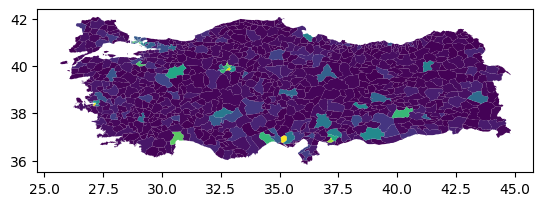

In [138]:

merged_level1.plot(column='Population')


### Q3)

First thing I did was to check our third lecture where we used the World Bank Data API. [Lecture 3](https://github.com/kaygun/2023-Fall-381E/blob/main/lectures/lecture-03.ipynb)

In [139]:
import wbgapi as wb

Then, I started searching for the datasets required for our task. 


[Child mortality under 5 year olds](https://databank.worldbank.org/source/world-development-indicators/Series/SH.DYN.MORT#)--->SH.DYN.MORT   
[Female literacy rate for ages 15+](https://databank.worldbank.org/reports.aspx?source=2&series=SE.ADT.LITR.FE.ZS&country=#)--->SE.ADT.LITR.FE.ZS     
[Female labor force participation rate for ages 15+](https://databank.worldbank.org/reports.aspx?source=2&series=SL.TLF.CACT.FE.ZS&country=) --->SL.TLF.CACT.FE.ZS    
[Poverty headcount ratio at 3.65 a day as a percentage of the population](https://databank.worldbank.org/source/world-development-indicators/Series/SI.POV.LMIC) --->SI.POV.LMIC  
[GDP Per capita](https://databank.worldbank.org/reports.aspx?source=2&series=NY.GDP.PCAP.CD&country=)---> NY.GDP.PCAP.CD   
[CPIA gender equality rating](https://databank.worldbank.org/reports.aspx?source=2&series=IQ.CPA.GNDR.XQ&country=)--->IQ.CPA.GNDR.XQ    

I will create a function to avoid repetation of creating the dataframe for the same countries again and again. After I create the "df" , first I will get rid of the duplicates if there are any. 

I won't be dealing with null values yet since I am dealing with a time series and don't want to lose values when I merge the tables.  

I will change the "value" columns to column names which were tasked to me; it will be easier to do it inside the function. I will also drop some columns which I won't be needing. Lastly, I am going to change the order of the columns.


In [140]:
def createdfs(codeofdf,nameofdf):
 df=pd.DataFrame(wb.data.fetch(codeofdf,economy=["ALB","BIH","BGR","HRV","KSV","MNE","MKD","ROU","SRB","SVN","TUR","GRC","CYP","MLT","ITA","POL","BLR","UKR"]))
 df=df.drop_duplicates()
 df=df.drop(["series","aggregate"],axis="columns")
 df=df.rename(columns={"value": nameofdf, "economy":"Country","time": "Year"})  
 df=df[['Year', 'Country', nameofdf]]
 print(df)
 print(df.info())   
 return df   

Now I will create the dataframes one by one to see each of them while creating them. I will assign them the name of their values in order to avoid any confusion.

In [141]:
Child_Mortality=createdfs("SH.DYN.MORT","Child Mortality")

        Year Country  Child Mortality
0     YR2022     UKR              NaN
1     YR2021     UKR              8.2
2     YR2020     UKR              8.4
3     YR2019     UKR              8.5
4     YR2018     UKR              8.7
5     YR2017     UKR              8.9
6     YR2016     UKR              9.2
7     YR2015     UKR              9.4
8     YR2014     UKR              9.8
9     YR2013     UKR             10.2
10    YR2012     UKR             10.6
11    YR2011     UKR             11.2
12    YR2010     UKR             11.7
13    YR2009     UKR             12.3
14    YR2008     UKR             12.9
15    YR2007     UKR             13.4
16    YR2006     UKR             13.9
17    YR2005     UKR             14.5
18    YR2004     UKR             15.1
19    YR2003     UKR             15.9
20    YR2002     UKR             16.6
21    YR2001     UKR             17.5
22    YR2000     UKR             18.2
23    YR1999     UKR             19.0
24    YR1998     UKR             19.6
25    YR1997

The table seems fine to me.  

One issue is that: I have over 200 missing datas. I had thought that it was a big problem until I saw the others. I will be seeing what to do with them after I merge.

In [142]:
Female_Literacy=createdfs("SE.ADT.LITR.FE.ZS","Female Literacy")

        Year Country  Female Literacy
0     YR2022     UKR              NaN
1     YR2021     UKR       100.000000
2     YR2020     UKR              NaN
3     YR2019     UKR              NaN
4     YR2018     UKR              NaN
5     YR2017     UKR              NaN
6     YR2016     UKR              NaN
7     YR2015     UKR              NaN
8     YR2014     UKR              NaN
9     YR2013     UKR              NaN
10    YR2012     UKR        99.958199
11    YR2011     UKR              NaN
12    YR2010     UKR              NaN
13    YR2009     UKR              NaN
14    YR2008     UKR              NaN
15    YR2007     UKR              NaN
16    YR2006     UKR              NaN
17    YR2005     UKR              NaN
18    YR2004     UKR              NaN
19    YR2003     UKR              NaN
20    YR2002     UKR              NaN
21    YR2001     UKR        99.171570
22    YR2000     UKR              NaN
23    YR1999     UKR              NaN
24    YR1998     UKR              NaN
25    YR1997

This time I have a huge number of missing values. More than 90 percent of my data is missing. I will probably be cutting some years off the analysis after I merge.

In [143]:
Female_Workforce_Participation=createdfs("SL.TLF.CACT.FE.ZS","Female Workforce Participation")

        Year Country  Female Workforce Participation
0     YR2022     UKR                             NaN
1     YR2021     UKR                          47.791
2     YR2020     UKR                          48.151
3     YR2019     UKR                          49.260
4     YR2018     UKR                          49.542
5     YR2017     UKR                          49.827
6     YR2016     UKR                          50.113
7     YR2015     UKR                          50.400
8     YR2014     UKR                          50.690
9     YR2013     UKR                          50.980
10    YR2012     UKR                          51.271
11    YR2011     UKR                          51.563
12    YR2010     UKR                          51.855
13    YR2009     UKR                          52.147
14    YR2008     UKR                          52.438
15    YR2007     UKR                          52.730
16    YR2006     UKR                          52.623
17    YR2005     UKR                          

In [144]:
Poverty=createdfs("SI.POV.LMIC","Poverty")

        Year Country  Poverty
0     YR2022     UKR      NaN
1     YR2021     UKR      NaN
2     YR2020     UKR      0.2
3     YR2019     UKR      0.3
4     YR2018     UKR      0.5
5     YR2017     UKR      0.6
6     YR2016     UKR      0.7
7     YR2015     UKR      0.9
8     YR2014     UKR      0.2
9     YR2013     UKR      0.3
10    YR2012     UKR      0.4
11    YR2011     UKR      0.5
12    YR2010     UKR      0.4
13    YR2009     UKR      1.0
14    YR2008     UKR      0.9
15    YR2007     UKR      2.1
16    YR2006     UKR      2.7
17    YR2005     UKR      3.9
18    YR2004     UKR      8.3
19    YR2003     UKR     10.4
20    YR2002     UKR     17.0
21    YR2001     UKR      NaN
22    YR2000     UKR      NaN
23    YR1999     UKR      NaN
24    YR1998     UKR      NaN
25    YR1997     UKR      NaN
26    YR1996     UKR     28.0
27    YR1995     UKR     24.8
28    YR1994     UKR      NaN
29    YR1993     UKR     13.8
30    YR1992     UKR     16.3
31    YR1991     UKR      NaN
32    YR19

In [145]:
GDP=createdfs("NY.GDP.PCAP.CD","GDP")

        Year Country           GDP
0     YR2022     UKR   4533.975586
1     YR2021     UKR   4827.845703
2     YR2020     UKR   3751.737305
3     YR2019     UKR   3661.457764
4     YR2018     UKR   3096.562500
5     YR2017     UKR   2638.325439
6     YR2016     UKR   2187.727539
7     YR2015     UKR   2124.662598
8     YR2014     UKR   3104.653809
9     YR2013     UKR   4187.739746
10    YR2012     UKR   4004.789795
11    YR2011     UKR   3704.842285
12    YR2010     UKR   3078.414795
13    YR2009     UKR   2639.377930
14    YR2008     UKR   4066.531250
15    YR2007     UKR   3197.934326
16    YR2006     UKR   2391.323975
17    YR2005     UKR   1894.460083
18    YR2004     UKR   1416.603760
19    YR2003     UKR   1087.787964
20    YR2002     UKR    911.906860
21    YR2001     UKR    807.801941
22    YR2000     UKR    658.344604
23    YR1999     UKR    635.757996
24    YR1998     UKR    835.236755
25    YR1997     UKR    991.242615
26    YR1996     UKR    872.713684
27    YR1995     UKR

In [146]:
Gender_Equality=createdfs("IQ.CPA.GNDR.XQ","Gender Equality")

        Year Country  Gender Equality
0     YR2022     UKR              NaN
1     YR2021     UKR              NaN
2     YR2020     UKR              NaN
3     YR2019     UKR              NaN
4     YR2018     UKR              NaN
5     YR2017     UKR              NaN
6     YR2016     UKR              NaN
7     YR2015     UKR              NaN
8     YR2014     UKR              NaN
9     YR2013     UKR              NaN
10    YR2012     UKR              NaN
11    YR2011     UKR              NaN
12    YR2010     UKR              NaN
13    YR2009     UKR              NaN
14    YR2008     UKR              NaN
15    YR2007     UKR              NaN
16    YR2006     UKR              NaN
17    YR2005     UKR              NaN
18    YR2004     UKR              NaN
19    YR2003     UKR              NaN
20    YR2002     UKR              NaN
21    YR2001     UKR              NaN
22    YR2000     UKR              NaN
23    YR1999     UKR              NaN
24    YR1998     UKR              NaN
25    YR1997

### Merging the Data Frame

I got some help from chat gpt here. My log can be seen [here](https://chat.openai.com/share/be6fbbb4-9477-4e52-b8ba-45974664e3fd)  
First I tried the method we did at class but then I found out that using this "reduce" library was easier to work for multiple datasets. 

I also splitted the year column so that I can filter and do operations on spesific years. Since I only have dates, I used the integer type for this task.

In [147]:
from functools import reduce


dfs = [Child_Mortality,Female_Literacy,Female_Workforce_Participation,GDP,Poverty,Gender_Equality]


merged_df = reduce(lambda left, right: pd.merge(left, right, on=['Year',"Country"]), dfs)
Year=merged_df['Year'].apply(lambda x: x.split('R')[1])
merged_df.drop(['Year'], axis=1, inplace=True)
merged_df.insert(0, 'Year', Year)
merged_df['Year'] = merged_df['Year'].astype("int")
merged_df.head(10)


Year Country  Child Mortality  Female Literacy  \
0  2022     UKR              NaN              NaN   
1  2021     UKR              8.2            100.0   
2  2020     UKR              8.4              NaN   
3  2019     UKR              8.5              NaN   
4  2018     UKR              8.7              NaN   
5  2017     UKR              8.9              NaN   
6  2016     UKR              9.2              NaN   
7  2015     UKR              9.4              NaN   
8  2014     UKR              9.8              NaN   
9  2013     UKR             10.2              NaN   

   Female Workforce Participation          GDP  Poverty  Gender Equality  
0                             NaN  4533.975586      NaN              NaN  
1                          47.791  4827.845703      NaN              NaN  
2                          48.151  3751.737305      0.2              NaN  
3                          49.260  3661.457764      0.3              NaN  
4                          49.542  3096.562500      0.5              NaN  
5                          49.827  2638.325439      0.6              NaN  
6                          50.113  2187.727539      0.7              NaN  
7                          50.400  2124.662598      0.9              NaN  
8                          50.690  3104.653809      0.2              NaN  
9                          50.980  4187.739746      0.3              NaN

<Axes: >

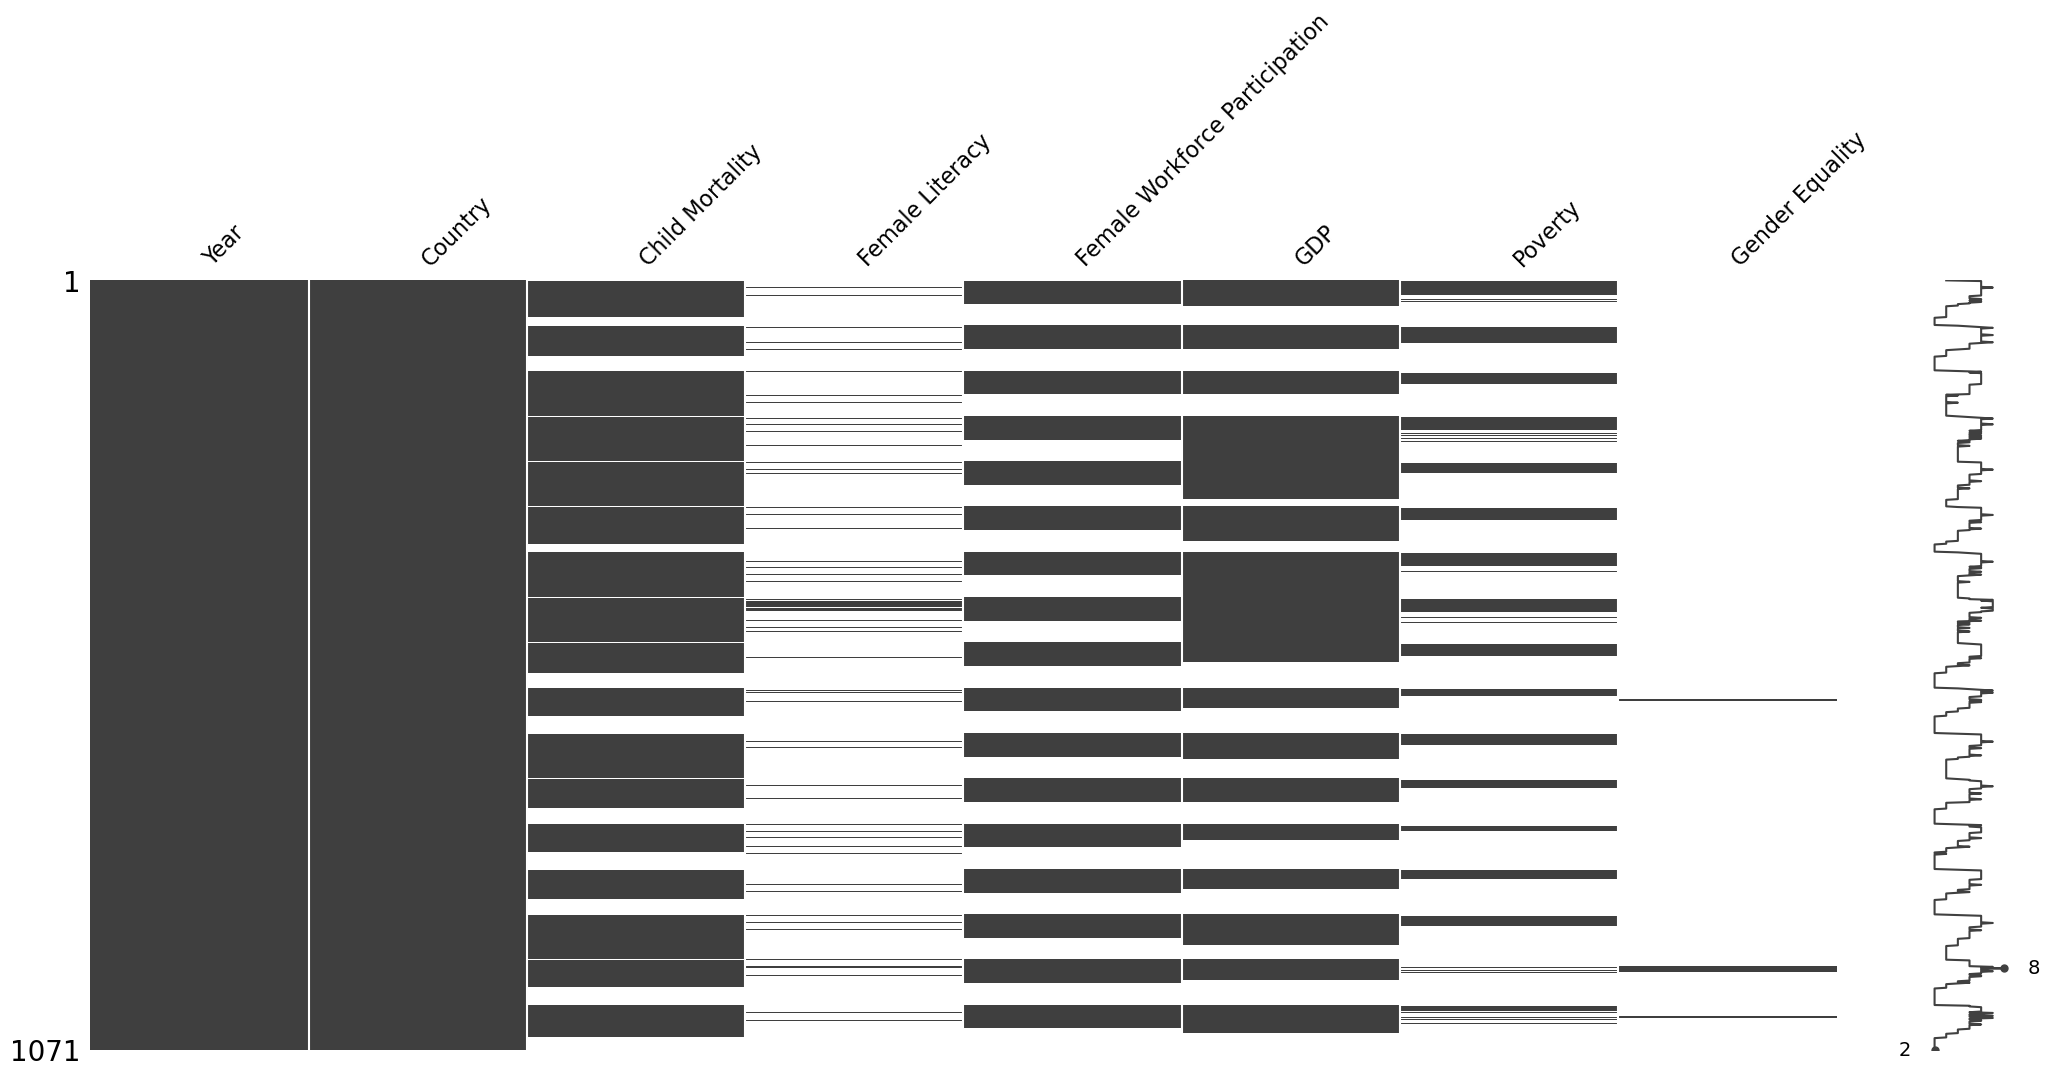

In [148]:
import missingno as msno
msno.matrix(merged_df)

Up to this point, I was thinking of doing interpolation and cover my missing values. However, after seeing that I have lots and lots of missing points, I wanted to just leave it as it is. I will do the tasks with the datas I have.

#### First Function

I will write an easy function to be able to illsutrate the column for the countries I want to see and fulfill the task.

In [149]:
def timeseries(dataf,country,column):
    
    dataf[dataf["Country"]==country][["Year", column]].plot(x='Year', y=column, marker='o', linestyle='-', color='b')
    plt.title(country +" " + column)

In Ukraine we are seeing a constant decline of Child Mortality from 1970 to 2020's, expect a 10 year period where it had a little increase till 1997. 

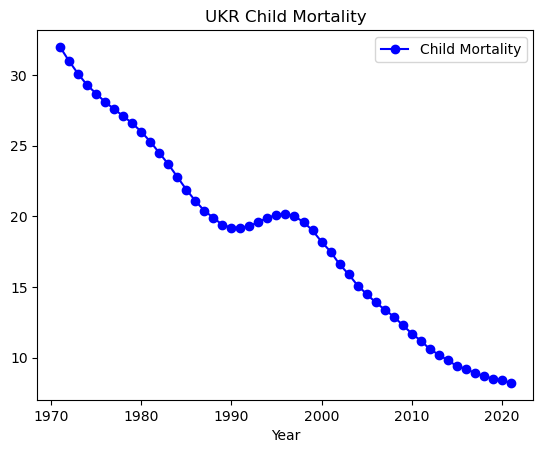

In [150]:
timeseries(merged_df,"UKR","Child Mortality")

Let's see Albania's Female Workforce Participation

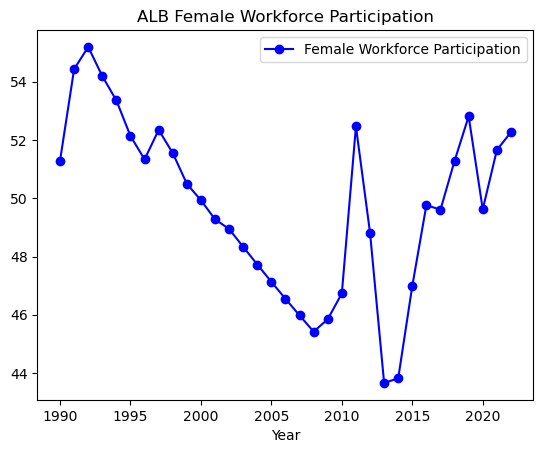

In [151]:
timeseries(merged_df,"ALB","Female Workforce Participation")

I wanted to see this for Turkey as well.

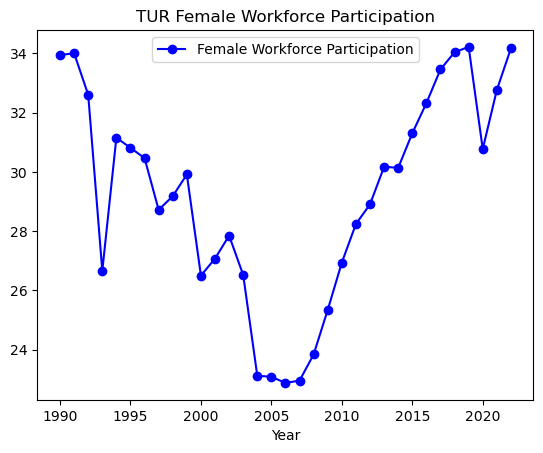

In [152]:
timeseries(merged_df,"TUR","Female Workforce Participation")

Here, tbh I didn't understand why both Turkey and Albania had a gradual decrease till 2005. I started doing some research. For Turkey I managed to find an [article](https://dergipark.org.tr/tr/download/article-file/368738) explaining this U shape. I believe it is the same case for Albania as well.

Next, I wanted to see Italy in terms of Poverty. As can be seen on my missing data chart "Poverty" is one of the columns which data doesnt go back that far. Here, deleting the years before 2003 or also doing some interpolation crossed my mind but the data was so distinct from each other for those years and it was quite a few. Hence I left it like this as it is all I got. 

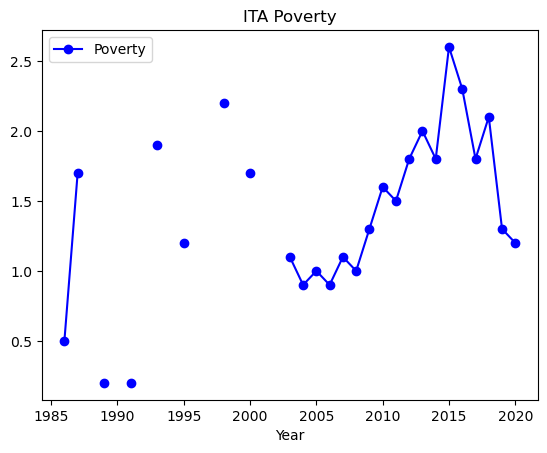

In [153]:
timeseries(merged_df,"ITA","Poverty")

#### Second Function

This time I wrote a code to plot two columns for the desired years in a scatterplot. I needed a small aid of Chat-gpt in order to find how to use the pyhton version of "where in" of SQL. Here is my [log](https://chat.openai.com/share/681c949c-aa97-400b-9b87-ac611f0bc1bd).

In [154]:
def timeseriespair(dfpair,listofyears,column1,column2):
    dfpair=dfpair[dfpair["Year"].isin(listofyears)] 
    sns.scatterplot(y=dfpair[column1],x=dfpair[column2], alpha=1)
    
 

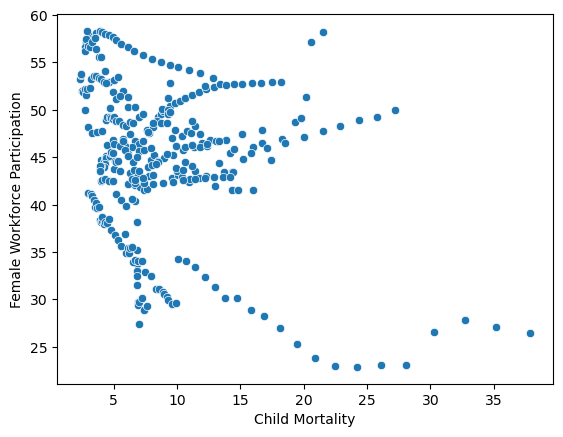

In [155]:
timeseriespair(merged_df,list(range(2000,2020)),"Female Workforce Participation","Child Mortality")

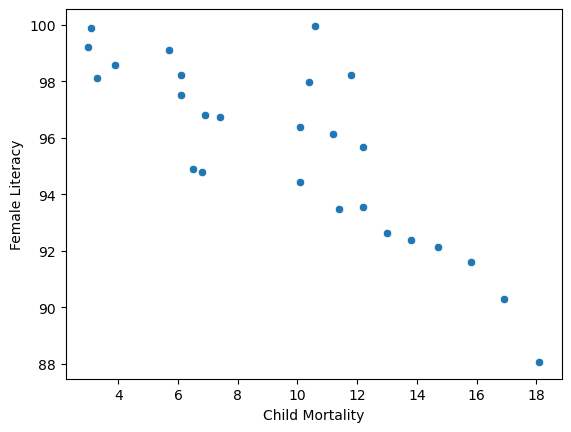

In [156]:
timeseriespair(merged_df,list(range(2010,2020)),"Female Literacy","Child Mortality")

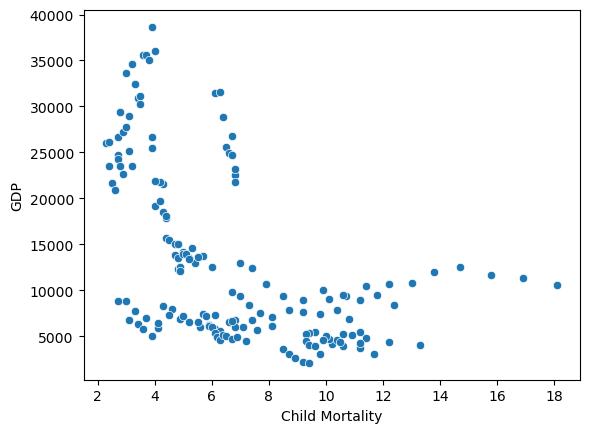

In [157]:
timeseriespair(merged_df,list(range(2010,2020)),"GDP","Child Mortality")

I also wanted to see GDP with Female Workforce Participation.

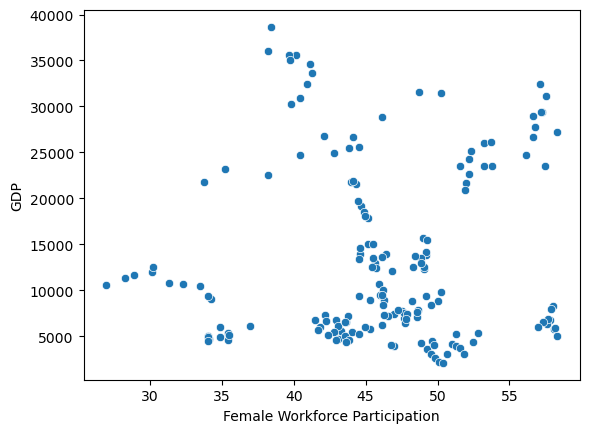

In [158]:
timeseriespair(merged_df,list(range(2010,2020)),"GDP","Female Workforce Participation")

#### Analyzing and Drawing Conclusions

1) I will start by drawing Child Mortality against Female Literacy. I will be using the same function and set the year range to cover all data.

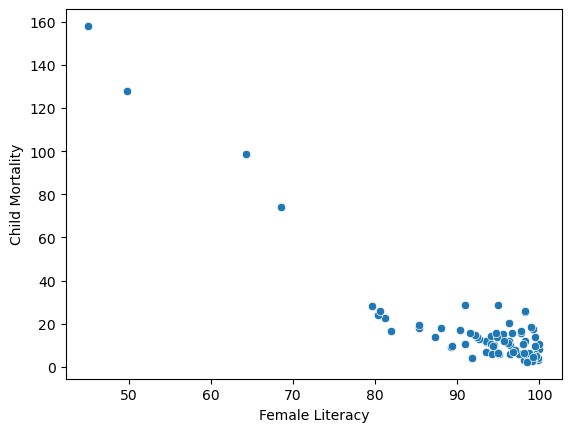

In [159]:
timeseriespair(merged_df,list(range(1950,2022)),"Child Mortality","Female Literacy")

Just as I expected: There is a clear relationship between Female Literacy and Child Mortality. Female literacy goes up while child mortality decreases. We can't say anything about whether this is a causal relationship by looking at this graph but we can easily note that the plot resembles a line which might indicate a relation. Well, higher female literacy is an indicator of development just like lover child mortality. So it is trivial to see a scatter plot like this in my opinion.  

I also want to find out whether I can prove my statement "there seems to be a linear relation". For that I know I need to perfom a linear regression that and evaluate it with my metrics. I got some help of [chat gpt](https://chat.openai.com/share/9e25f0db-5090-4dc6-a75d-cc35d166e4e2) to find the right function.



In [160]:
import scipy.stats

In [161]:

Cleared_to_statistically_tested=merged_df.dropna(subset=['Child Mortality', 'Female Literacy']).copy()


slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Cleared_to_statistically_tested['Child Mortality'], Cleared_to_statistically_tested['Female Literacy'])

p_value

1.5567630963828328e-29

Well,with a really high confidince level I can reject the null hyphothesis that there is no relation thanks to this p-value. 


  

2) Again I will use the same function to create the tasked plot. I had already checked this one before but now I will check it for all the years. I am expecting a surge in datapoints.

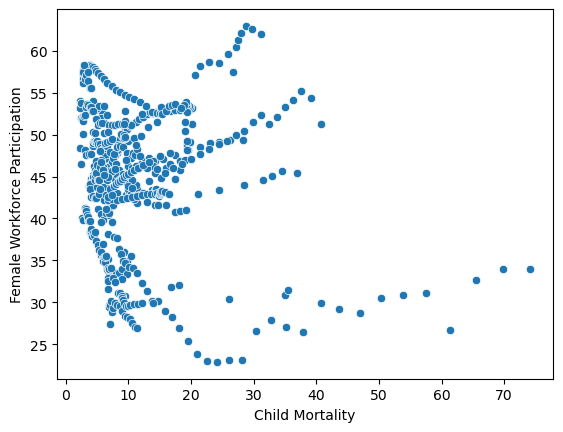

In [162]:
timeseriespair(merged_df,list(range(1950,2022)),"Female Workforce Participation","Child Mortality")

  This time the relation is not that clear. Looking at the values where Child Mortality is lower than 30, I found it hard to draw a conclusion. The datapoints seem diverse. After 30 , we might say that Female Workforce Participation is low. It doesnt get lower and lower, however it is stable and at a degree which one may consider "low". 
  
   To conclude, one might say that : when child mortality exceeds a level which can be considered "high"(>30) , female workforce is "low"(about 30%) in general.

#### The Violin Plot

For this spesific task, I checked our [fourth class](https://github.com/kaygun/2023-Fall-381E/blob/main/lectures/lecture-04.ipynb) since I knew we had an example of this.

<Axes: xlabel='Female Literacy', ylabel='Gender Equality'>

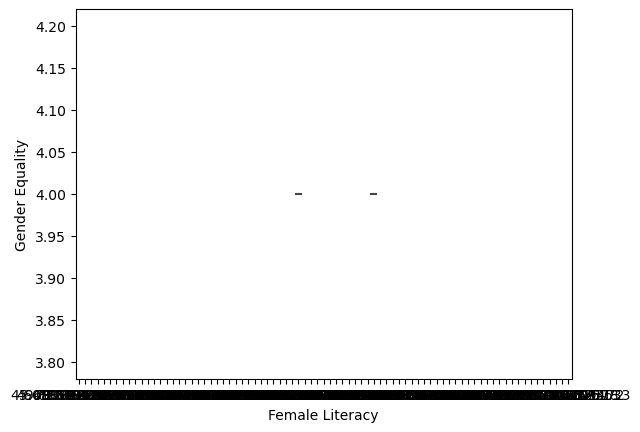

In [163]:
sns.violinplot(y=merged_df["Gender Equality"],x=merged_df["Female Literacy"])

I wasn't able to draw a proper one because I only had "13" gender equality data points. It is even less than the number of countries I had.

One last thing to note here, I already tried scatterplots with some null values in the columns many many times during the making of this exercise. It just leaves the nulls out as I wanted. Otherwise it could have had a negative impact on my analysis. So, I didn't do the cleaning myself, before I drew them. 